import libraries

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.io as pio
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

Read the Dataset

In [457]:
# fetching dataset-1
df1 = pd.read_csv(r"C:\Users\monab\Downloads\ElectricCarData_Norm (1).csv")
df1.head(5)

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   
3         BMW                            iX3        6.8           180   
4       Honda                              e        9.5           145   

   Range_KmH  Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain  \
0        450              161            940         Yes        AWS   
1        270              167            250         Yes        RWS   
2        400              181            620         Yes        AWS   
3        360              206            560         Yes        RWS   
4        170              168            190         Yes        RWS   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C      5      30000  
2  Type 2 CCS   Liftback       D      5      56440  
3  Type 2 CCS        SUV       D      5      68040  
4  Type 2 CCS  Hatchback       B      4      32997

In [458]:
# fetching dataset-2
df = pd.read_csv(r"C:\Users\monab\Downloads\EV Stats-1 (1).csv")
df.head(5)

Sl. No           State  \
0      1  Andhra Pradesh   
1      2           Assam   
2      3           Bihar   
3      4    Chhattisgarh   
4      5           Delhi   

   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
0                                              431.0                    
1                                              463.0                    
2                                              252.0                    
3                                              613.0                    
4                                             1395.0                    

   Two Wheelers (Category L2 (CMVR))  \
0                              692.0   
1                              138.0   
2                              430.0   
3                              382.0   
4                              251.0   

   Two Wheelers (Max power not exceeding 250 Watts)  2 Wheelers  \
0                                            4689.0      5812.0   
1                                            1006.0      1607.0   
2                                            2148.0      2830.0   
3                                            2078.0      3073.0   
4                                            5018.0      6664.0   

  Three Wheelers (Category L5 slow speed as per CMVR)  \
0                                                  0    
1                                                  0    
2                                                  6    
3                                                 58    
4                                                  0    

   Three Wheelers (Category L5 as per CMVR)  3 Wheelers     Cars  Buses  \
0                                       0.0         0.0   3680.0    0.0   
1                                     117.0       117.0    151.0    0.0   
2                                      64.0        70.0    271.0    0.0   
3                                     106.0       164.0    997.0    0.0   
4                                       1.0         1.0  12695.0   21.0   

   Total in state  
0          9492.0  
1          1875.0  
2          3171.0  
3          4234.0  
4         19381.0

In [459]:
df2 = df[['State','2 Wheelers','3 Wheelers','Cars','Buses','Total in state']]
df2

State  2 Wheelers  3 Wheelers  \
0                                      Andhra Pradesh      5812.0         0.0   
1                                               Assam      1607.0       117.0   
2                                               Bihar      2830.0        70.0   
3                                        Chhattisgarh      3073.0       164.0   
4                                               Delhi      6664.0         1.0   
5                                                 Goa         0.0         0.0   
6                                             Gujarat     15875.0         4.0   
7                                             Haryana     18574.0       137.0   
8                                    Himachal Pradesh         0.0         0.0   
9                                     Jammu & Kashmir       230.0         0.0   
10                                          Jharkhand      1039.0        16.0   
11                                          Karnataka      5140.0         2.0   
12                                             Kerala      5471.0         1.0   
13                                     Madhya Pradesh      3785.0       114.0   
14                                        Maharashtra     14873.0         9.0   
15                                            Manipur        35.0         5.0   
16                                          Meghalaya         0.0         0.0   
17                                           Nagaland        23.0         0.0   
18                                             Odisha      3232.0        37.0   
19                                             Punjab      2966.0         5.0   
20                                          Rajasthan     11564.0        83.0   
21                                         Tamil Nadu      9614.0         0.0   
22                                          Telangana      3502.0         2.0   
23                                            Tripura        73.0         0.0   
24                                      Uttar Pradesh     20508.0       256.0   
25                                         Uttarkhand      3830.0        83.0   
26                                        West Bengal     12297.0         3.0   
27                          Andaman & Nicobar islands         0.0         0.0   
28                                         Chandigarh      1526.0         0.0   
29                             Dadra and Nagar Haveli        13.0         0.0   
30                                                NaN         NaN         NaN   
31                                                NaN         NaN         NaN   
32     Electric Vehicles Sales report in india - 2018         NaN         NaN   
33  Sales of electric vehicles across India from f...         NaN         NaN   
34  Reasons for preferring an electric car over a ...         NaN         NaN   

       Cars  Buses  Total in state  
0    3680.0    0.0          9492.0  
1     151.0    0.0          1875.0  
2     271.0    0.0          3171.0  
3     997.0    0.0          4234.0  
4   12695.0   21.0         19381.0  
5     513.0    1.0           514.0  
6   15388.0    0.0         31267.0  
7    4878.0    0.0         23589.0  
8      98.0    0.0            98.0  
9     208.0    0.0           438.0  
10    655.0    0.0          1710.0  
11   8242.0    2.0         13386.0  
12   5729.0    1.0         11202.0  
13   2562.0    0.0          6461.0  
14  19129.0    2.0         34013.0  
15     12.0    0.0            52.0  
16      6.0    0.0             6.0  
17      1.0    0.0            24.0  
18    594.0    0.0          3863.0  
19   3567.0    0.0          6538.0  
20   4116.0    0.0         15763.0  
21   7132.0    0.0         16746.0  
22   5530.0    0.0          9034.0  
23      8.0    0.0            81.0  
24   5445.0    0.0         26209.0  
25    265.0    0.0          4178.0  
26   1840.0    0.0         14140.0  
27     82.0    0.0            82.0  
28    974.0    0.0          2500.0  
29    803.0    0.0   

Exploratory Data Analysis (EDA)

shape of the datasets

In [460]:
print('DF1 Shape:', df1.shape)
print('DF2 Shape:', df2.shape)

DF1 Shape: (103, 14)
DF2 Shape: (35, 6)


In [461]:
print('<<< DataSet1-------------------------------')
print(df1.info())
print('<<< DataSet2-------------------------------')
print(df2.info())

<<< DataSet1-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_KmH        103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
None
<<< DataSet2-------------------------------
<cl

Information of the type of data in search column

statistical summary of the datasets

In [462]:
print('<<<DataSet1-------------')
display(df1.describe())
print('<<<DataSet2-------------')
display(df2.describe())

<<<DataSet1-------------


AccelSec  TopSpeed_KmH   Range_KmH  Efficiency_WhKm       Seats  \
count  103.000000    103.000000  103.000000       103.000000  103.000000   
mean     7.396117    179.194175  338.786408       189.165049    4.883495   
std      3.017430     43.573030  126.014444        29.566839    0.795834   
min      2.100000    123.000000   95.000000       104.000000    2.000000   
25%      5.100000    150.000000  250.000000       168.000000    5.000000   
50%      7.300000    160.000000  340.000000       180.000000    5.000000   
75%      9.000000    200.000000  400.000000       203.000000    5.000000   
max     22.400000    410.000000  970.000000       273.000000    7.000000   

           PriceEuro  
count     103.000000  
mean    55811.563107  
std     34134.665280  
min     20129.000000  
25%     34429.500000  
50%     45000.000000  
75%     65000.000000  
max    215000.000000

<<<DataSet2-------------


2 Wheelers  3 Wheelers          Cars      Buses  Total in state
count     30.000000   30.000000     30.000000  30.000000       30.000000
mean    5138.533333   36.966667   3519.033333   0.900000     8695.433333
std     5995.899942   63.614943   4860.187299   3.835856     9911.814513
min        0.000000    0.000000      1.000000   0.000000        6.000000
25%      112.250000    0.000000    222.250000   0.000000      589.500000
50%     3152.500000    2.500000    985.500000   0.000000     4206.000000
75%     6451.000000   61.750000   5303.250000   0.000000    13951.500000
max    20508.000000  256.000000  19129.000000  21.000000    34013.000000

1. Analysis of EVs Car based on brands

Analysis of EVs based on speed

In [463]:
fig = px.bar(df1,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Brand-wise Speed Comparison of EVs Car in India',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

Analysis of EVs based on accleration

In [464]:
fig = px.bar(df1,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Accleration of EVs Car in India',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

Price Comparison 

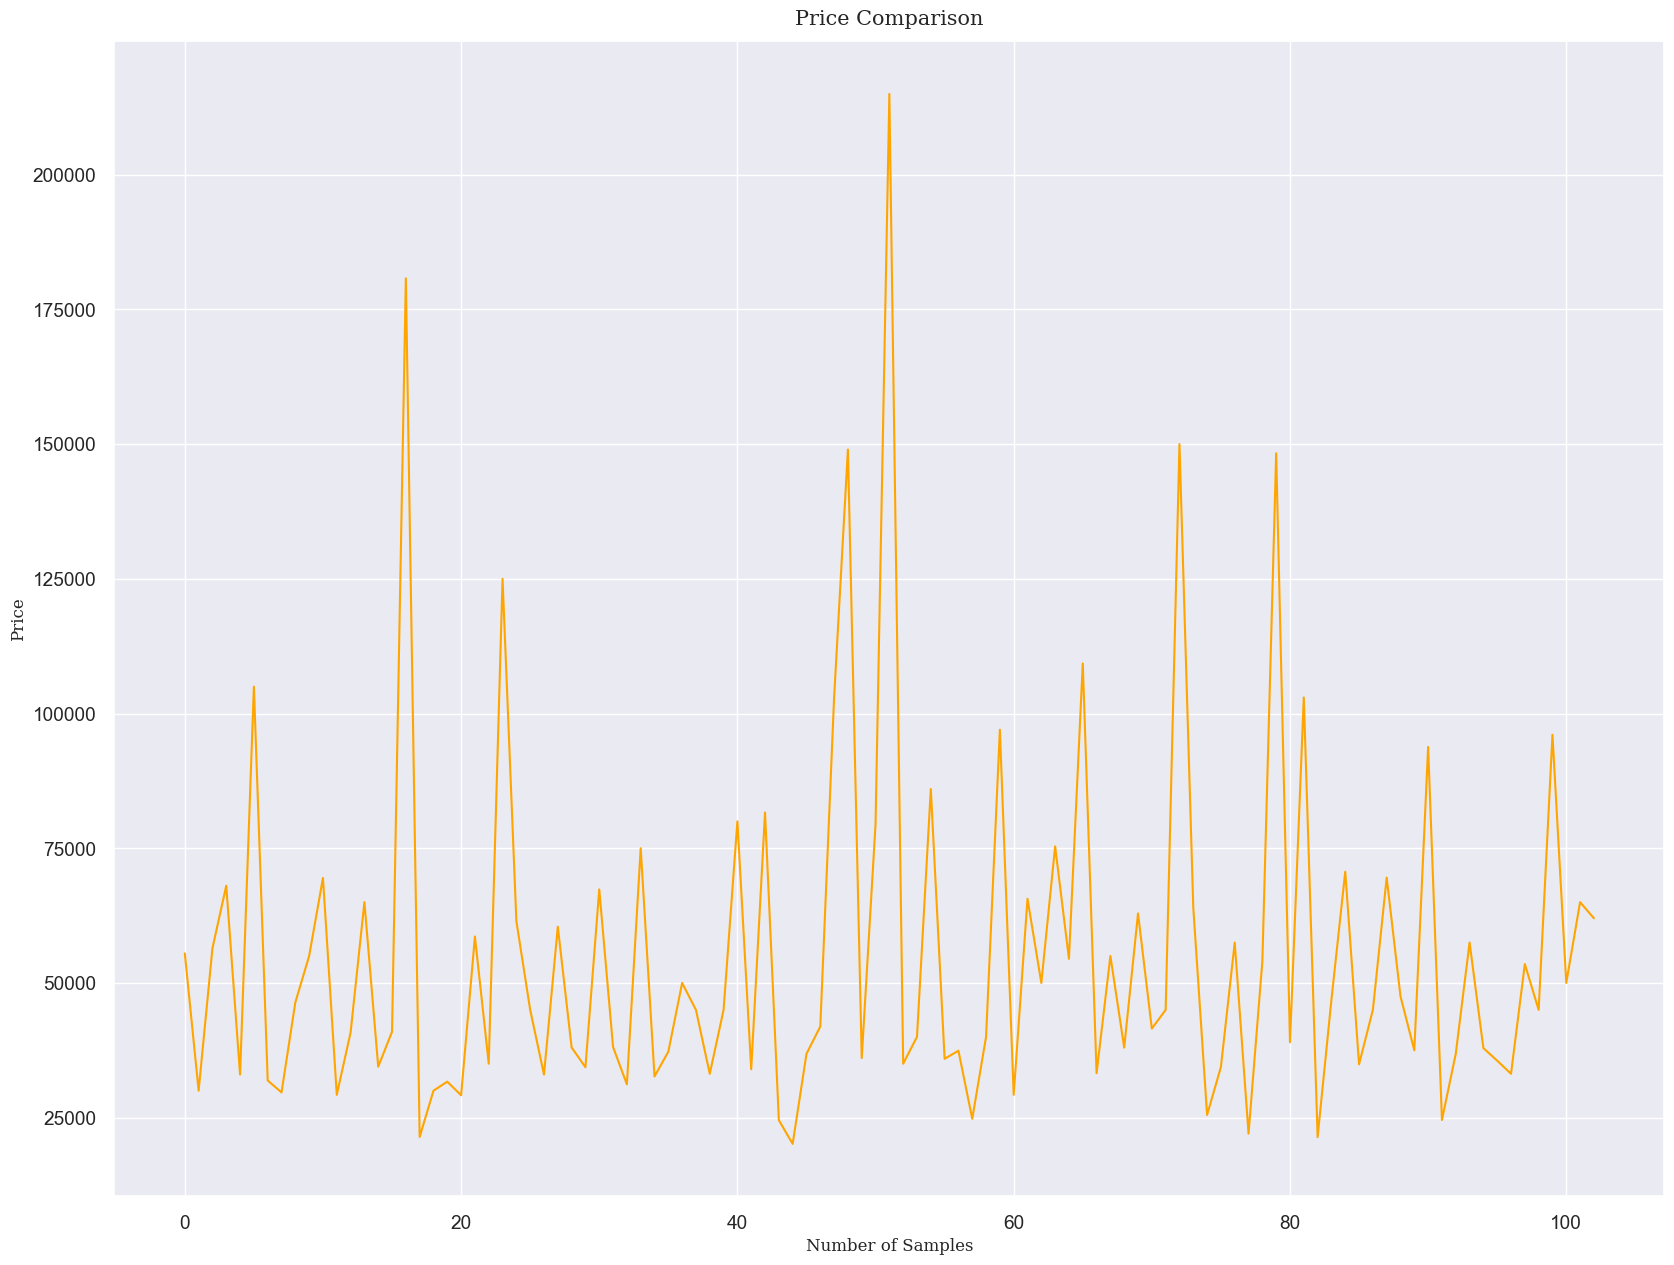

In [465]:
# plotting the price from dataset 3
plt.plot(df1['PriceEuro'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

Analysis of EVs Cars based on brands

Text(0.5, 1.0, 'Number of EV Models Manufactured by a Brand')

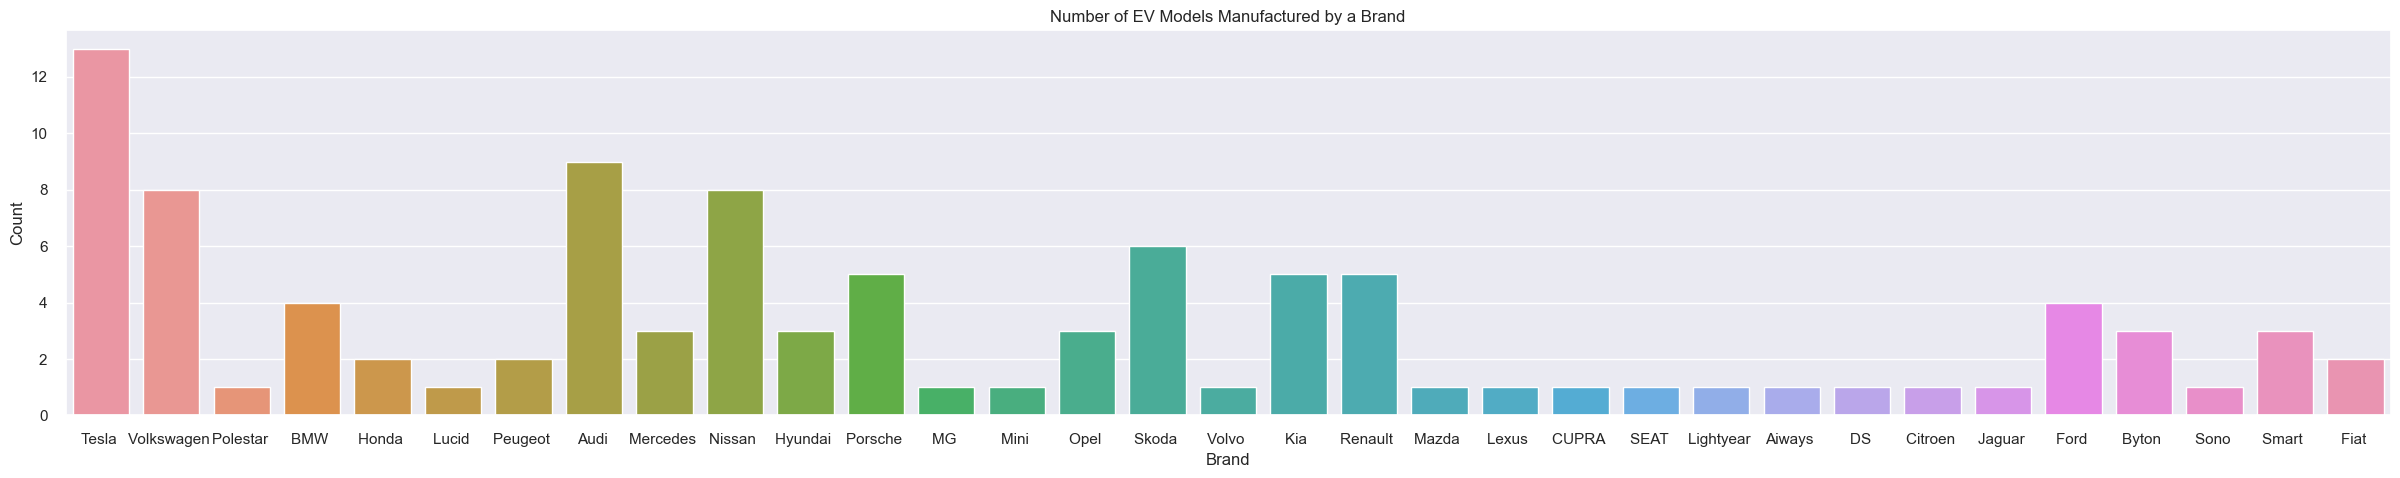

In [466]:
# plotting a bar chart for Brand and it's count
sns.set(rc={'figure.figsize':(30,5)})
# sns.set(font_scale=1.02)
ax = sns.countplot(data = df1, x = 'Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of EV Models Manufactured by a Brand')

Anaysis of different body types of EVs Car

Text(0.5, 1.0, 'Body Style')

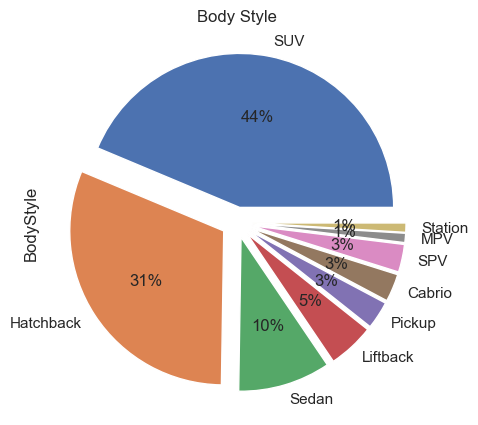

In [467]:

df1['BodyStyle'].value_counts().plot.pie(autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Analysis of different segments of EVs

([<matplotlib.patches.Wedge at 0x1b267c4b450>],
 [Text(-0.55, 6.735557395310444e-17, '')])

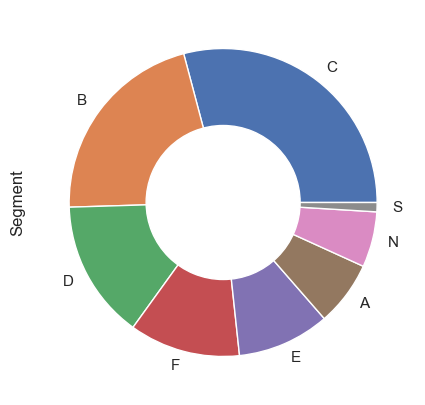

In [468]:
x = df1['Segment'].value_counts().plot.pie(radius=1)
plt.pie(x=[1], radius=.5, colors='white')

Analysis of EVs of different number of seats

Text(0.5, 1.0, 'Total number of seats in EVs')

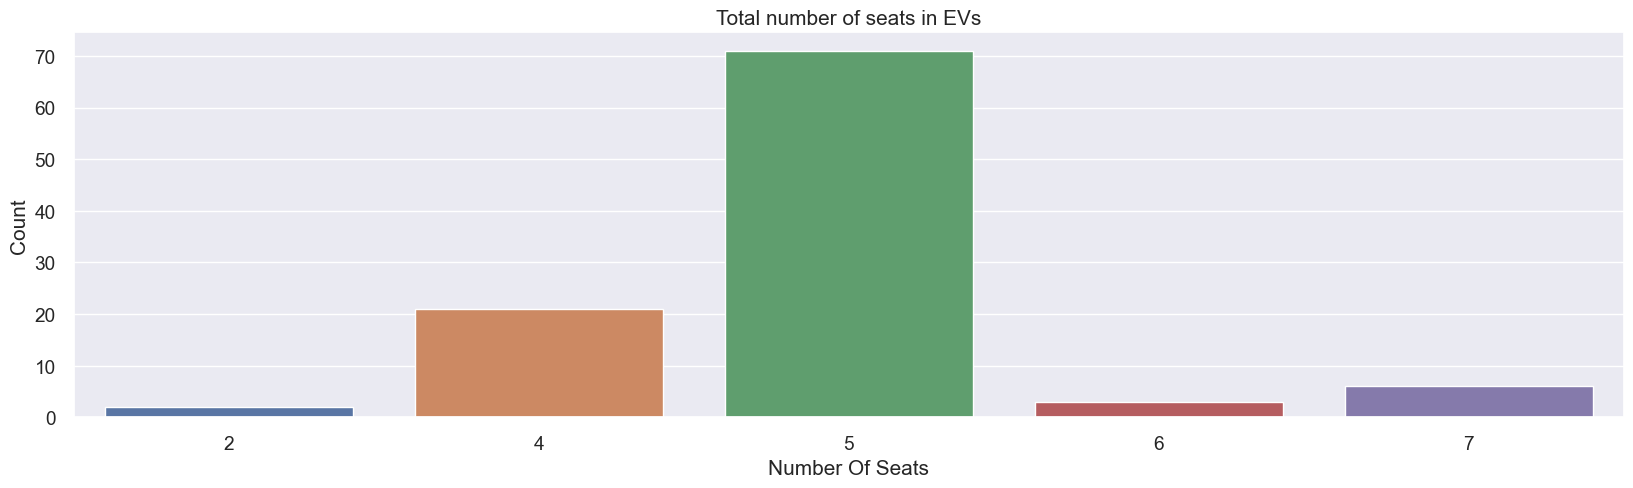

In [469]:
# plotting a bar chart for Evs Car of number of seats
sns.set(rc={'figure.figsize':(20,5)})
sns.set(font_scale=1.25)
ax = sns.countplot(data = df1, x = 'Seats')
plt.xlabel('Number Of Seats')
plt.ylabel('Count')
plt.title('Total number of seats in EVs')

Analysis of the number of seats by each brand

C:\Users\monab\AppData\Local\Temp\ipykernel_9004\3780865285.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




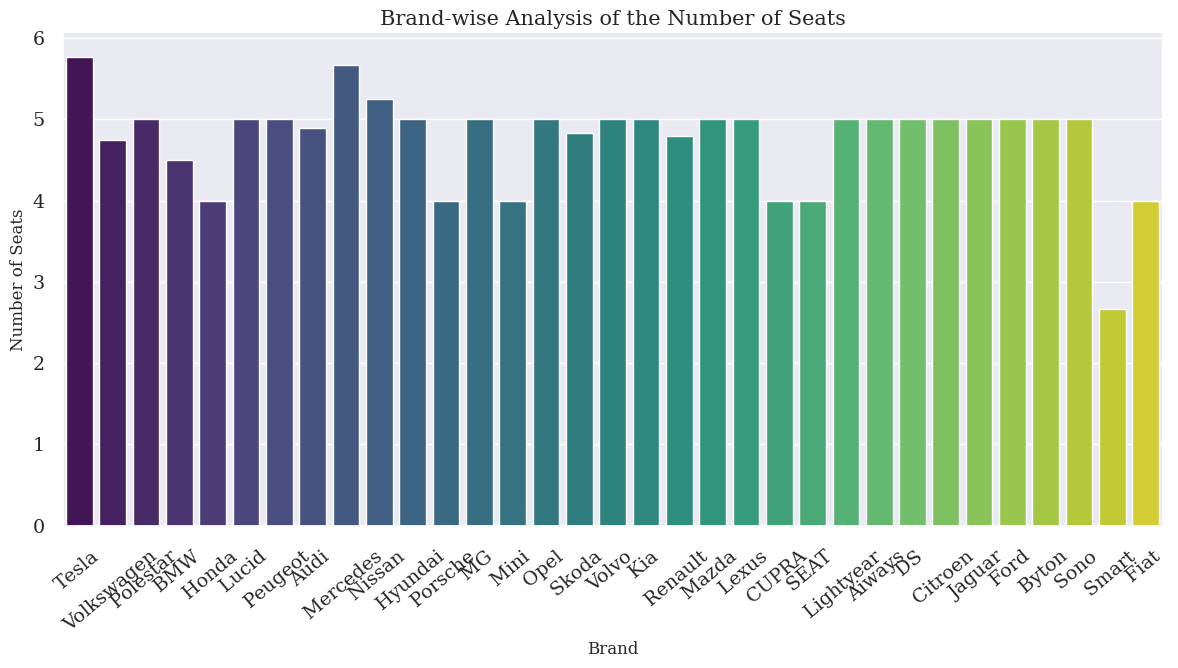

In [470]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df1, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
# sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);
     


Analysis of different plug types

Text(0.5, 1.0, 'Available Plug Types of EVs in India')

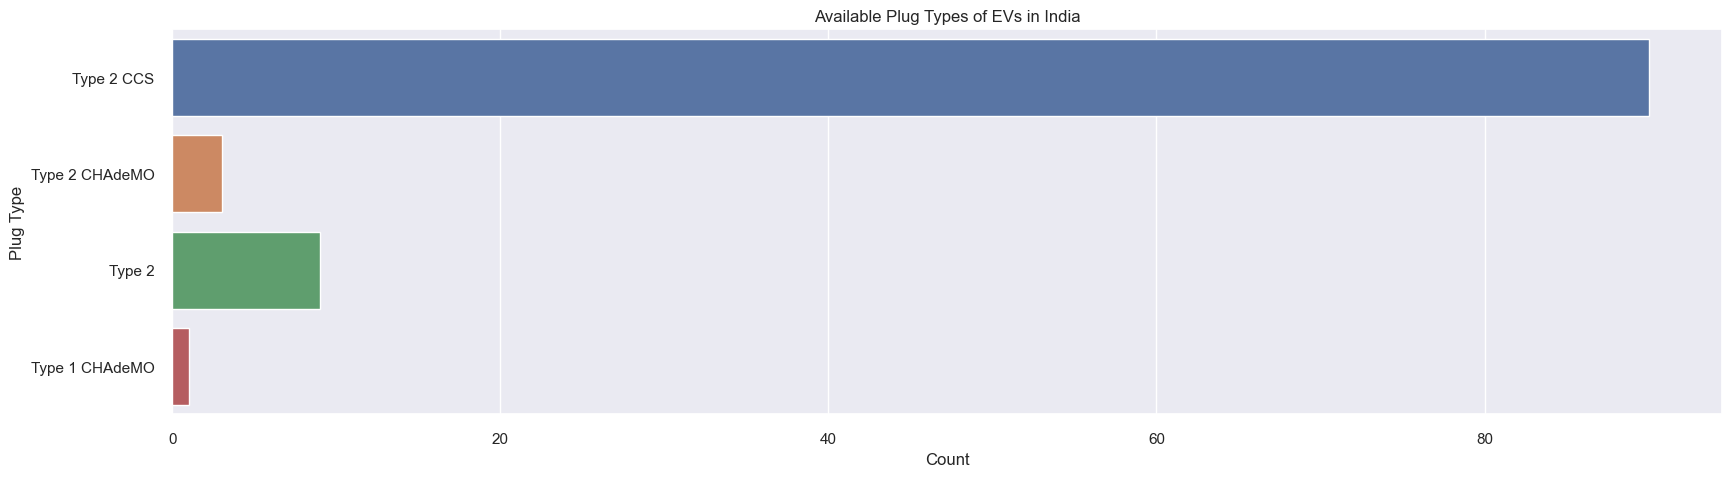

In [471]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df1, y = 'PlugType')
plt.xlabel('Count')
plt.ylabel('Plug Type')
plt.title('Available Plug Types of EVs in India')

Car efficiency

Text(0, 0.5, 'Efficiency')

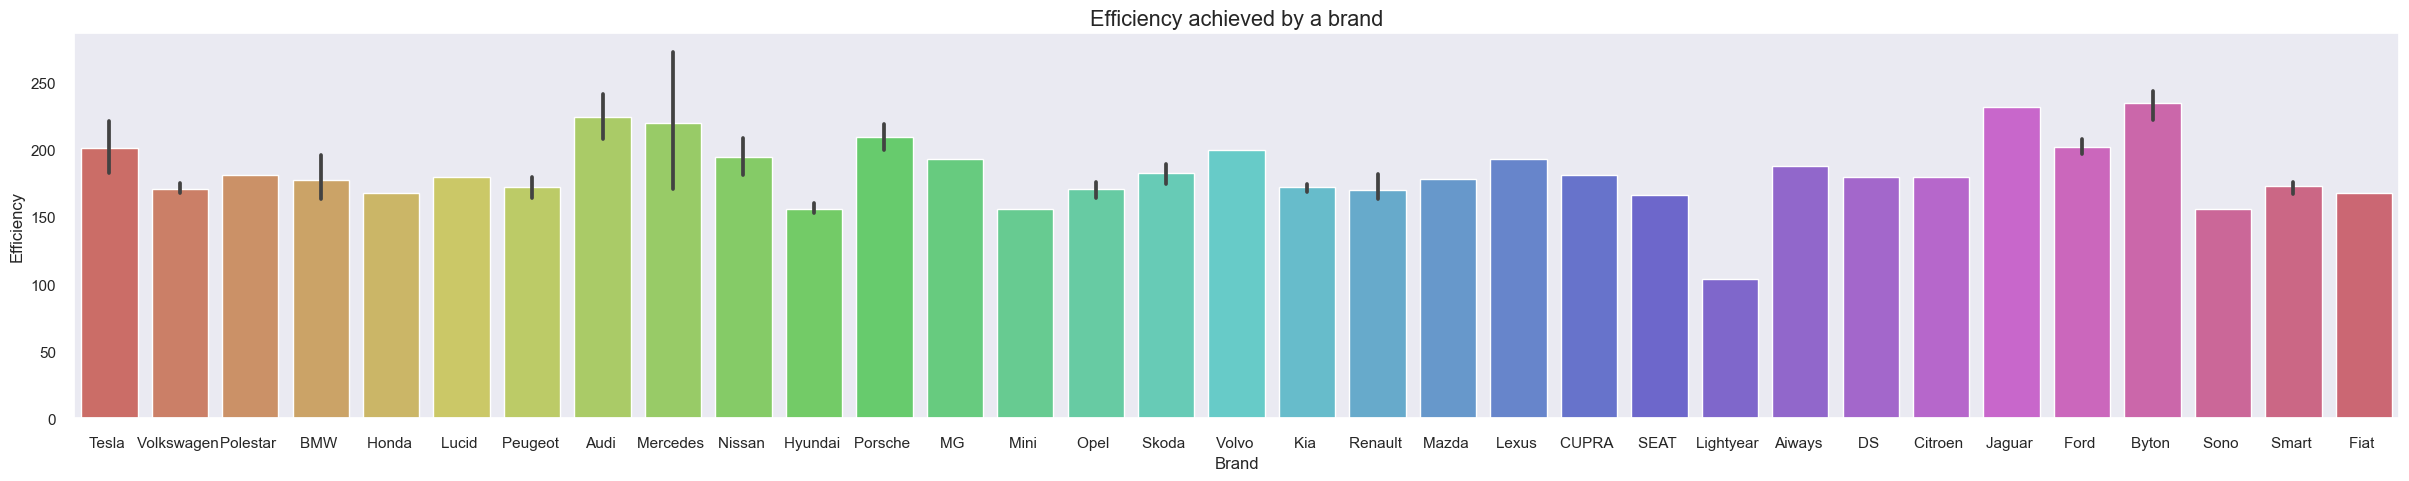

In [472]:
ax= plt.figure(figsize=(30,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df1,palette='hls')
sns.set(font_scale=1.30)
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
# plt.xticks(rotation=45)

Range a car can achieve

Text(0, 0.5, 'Range')

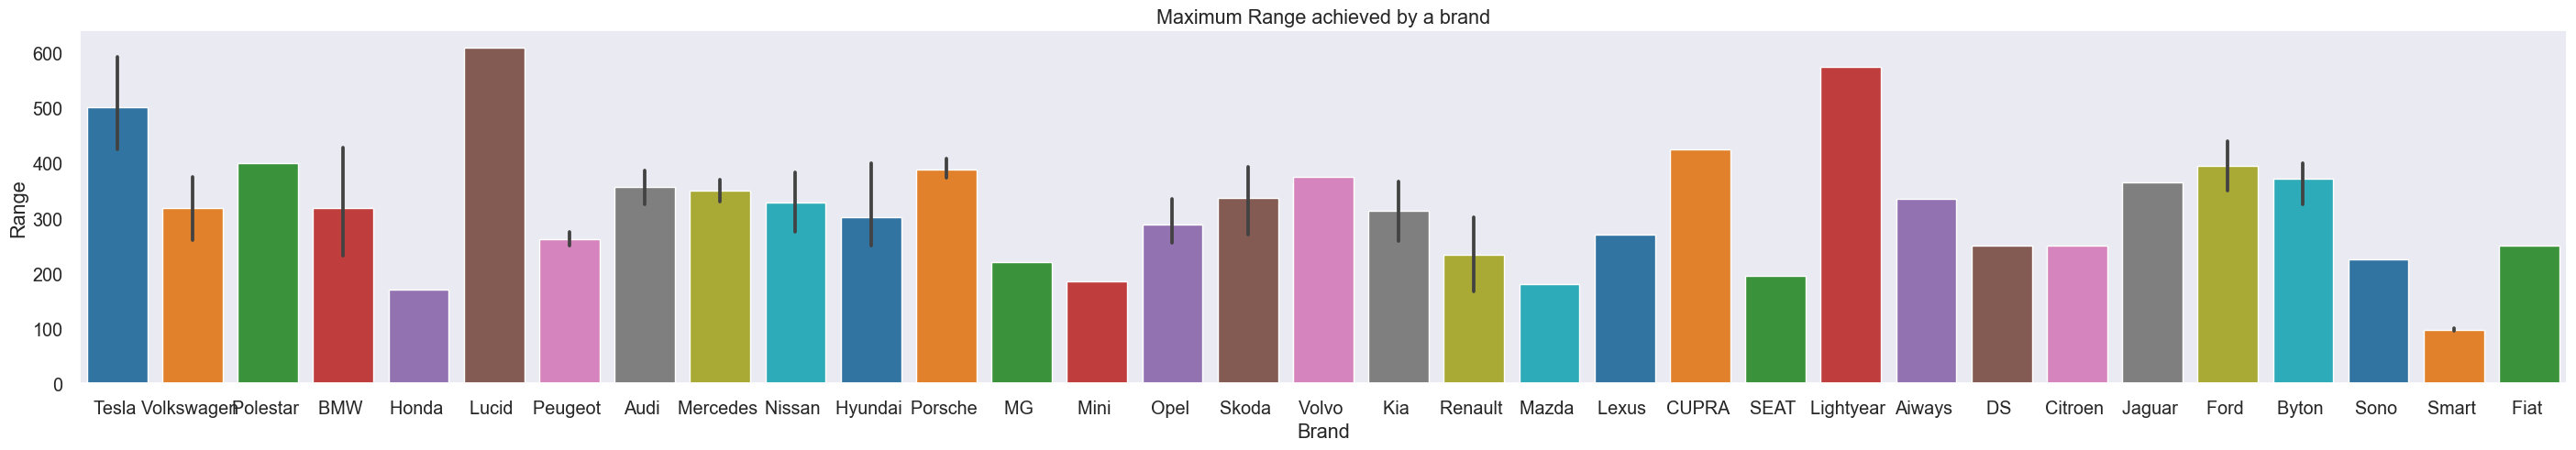

In [473]:
ax= plt.figure(figsize=(35,5))
sns.barplot(x='Brand',y='Range_KmH',data=df1,palette='tab10')
sns.set(font_scale=1.30)
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
# plt.xticks(rotation=45)

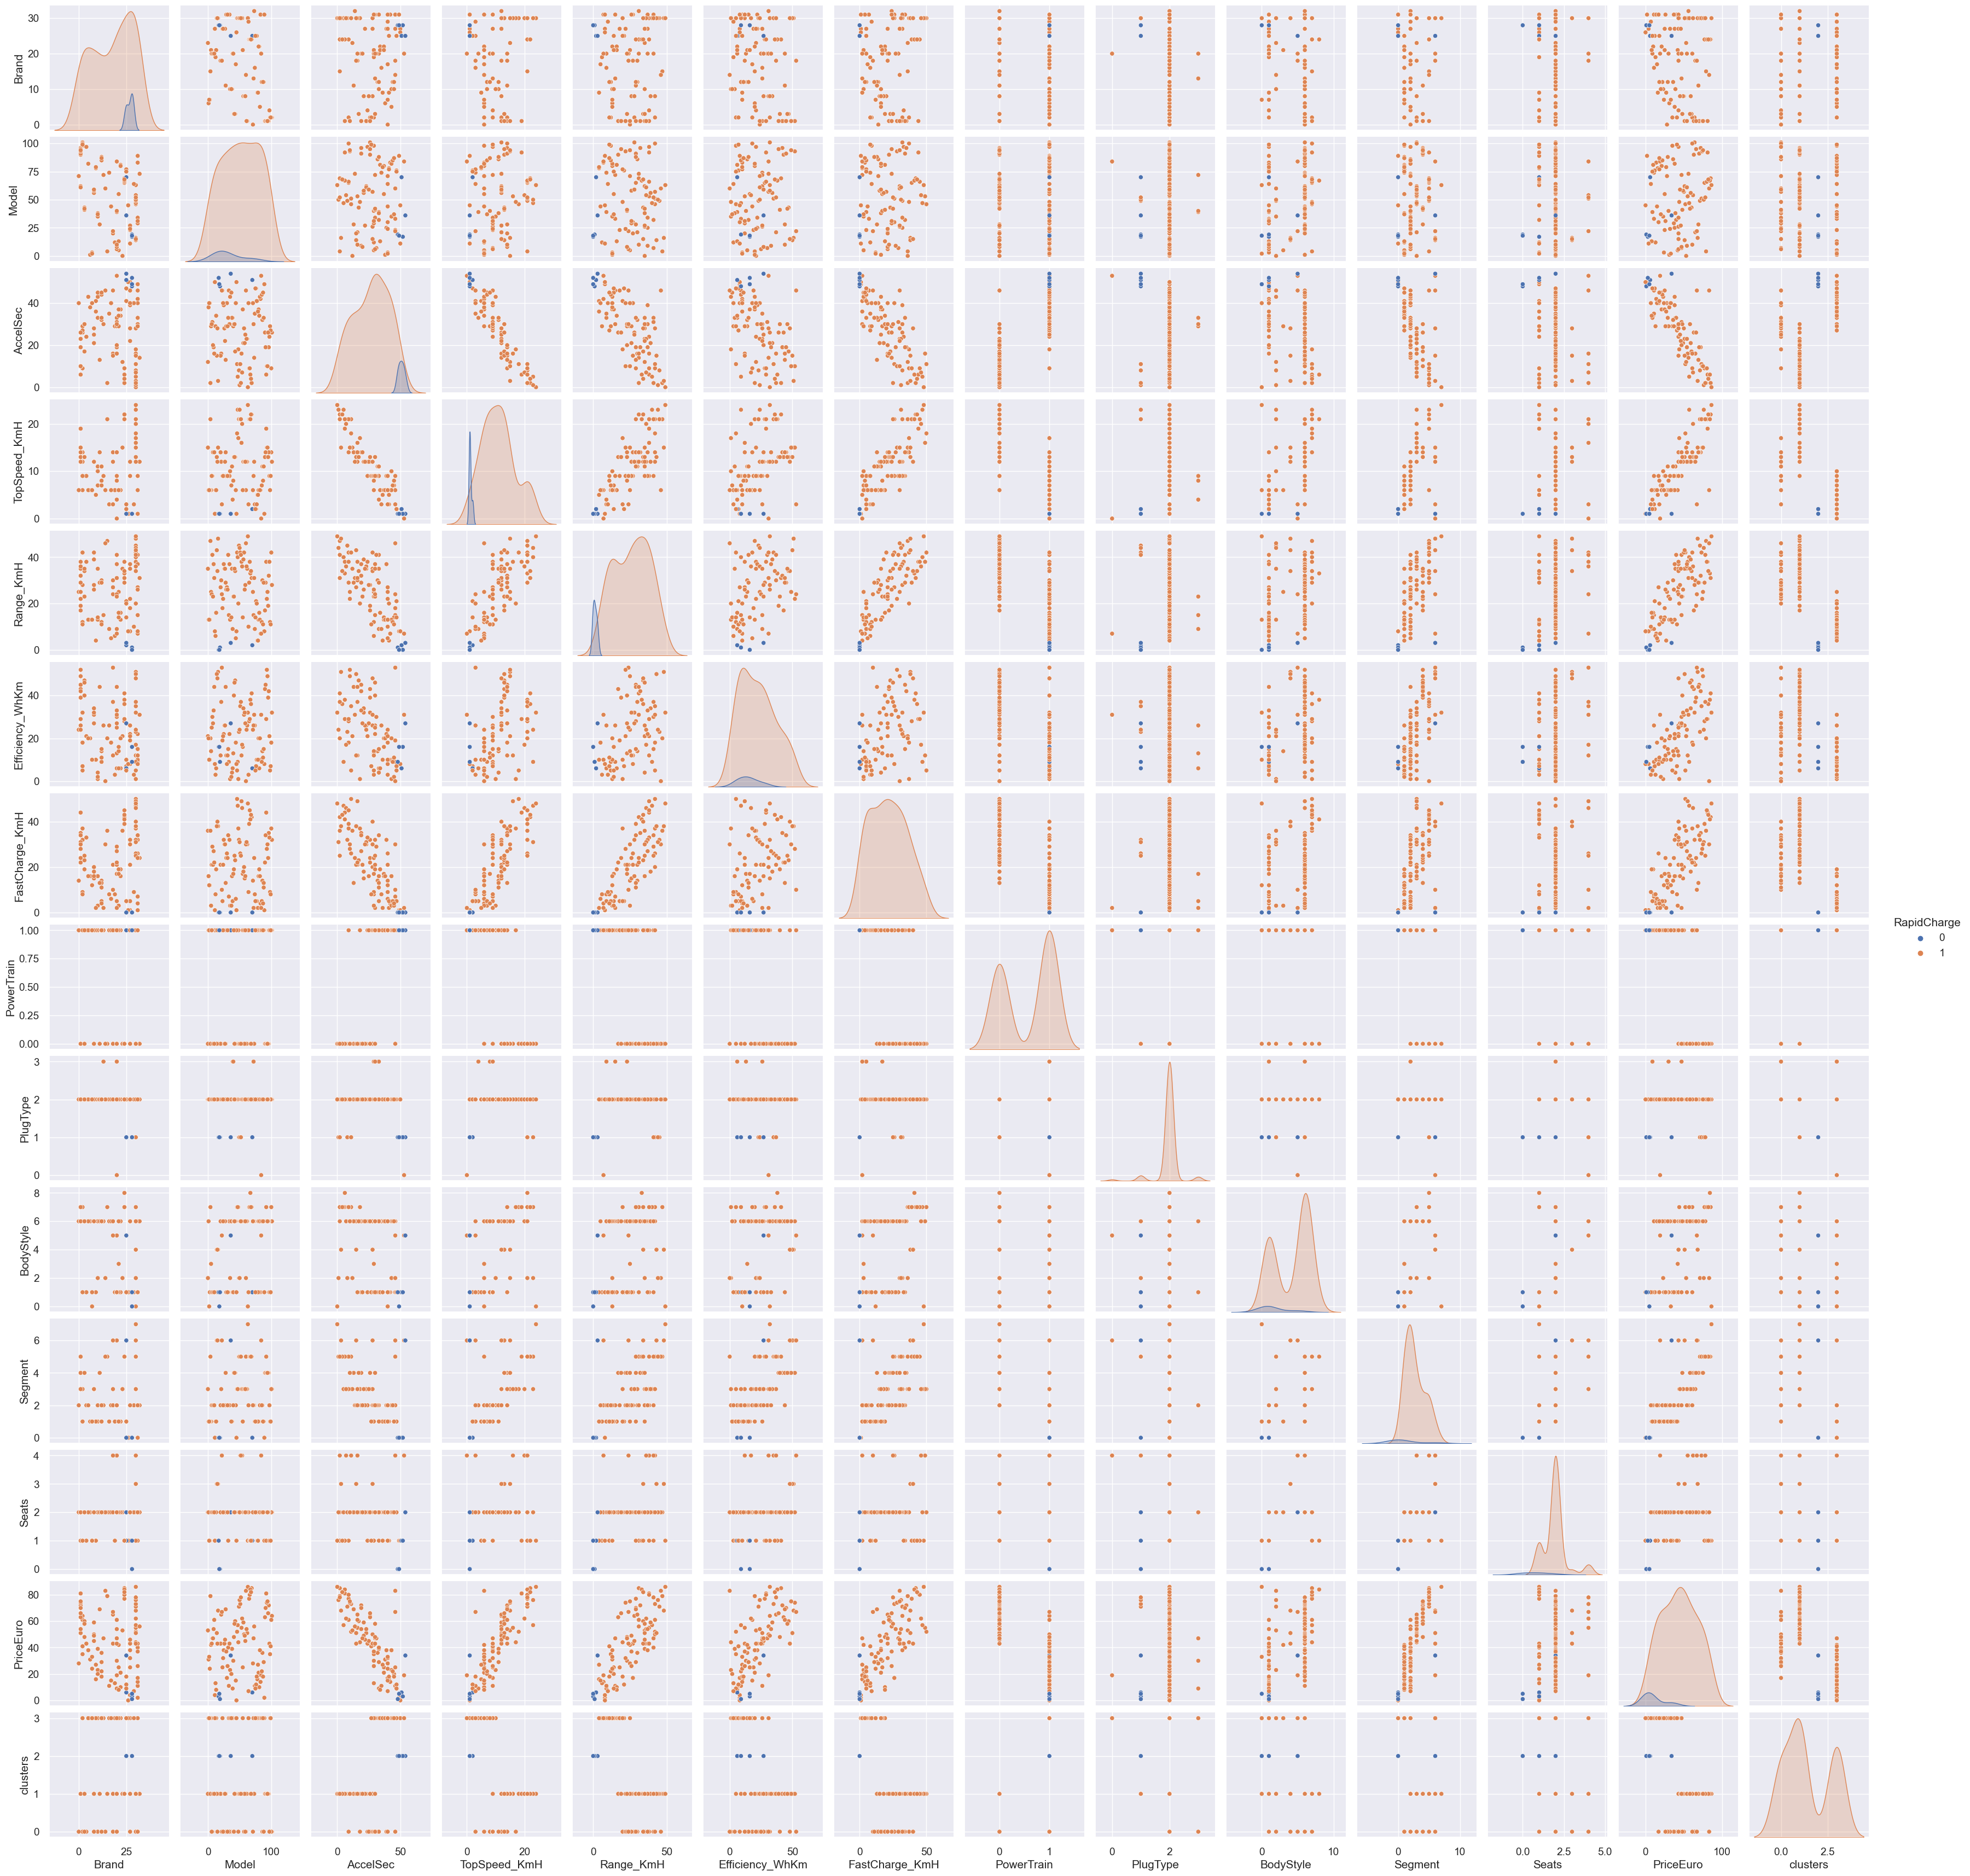

In [496]:
sns.pairplot(df1,hue='RapidCharge')

Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

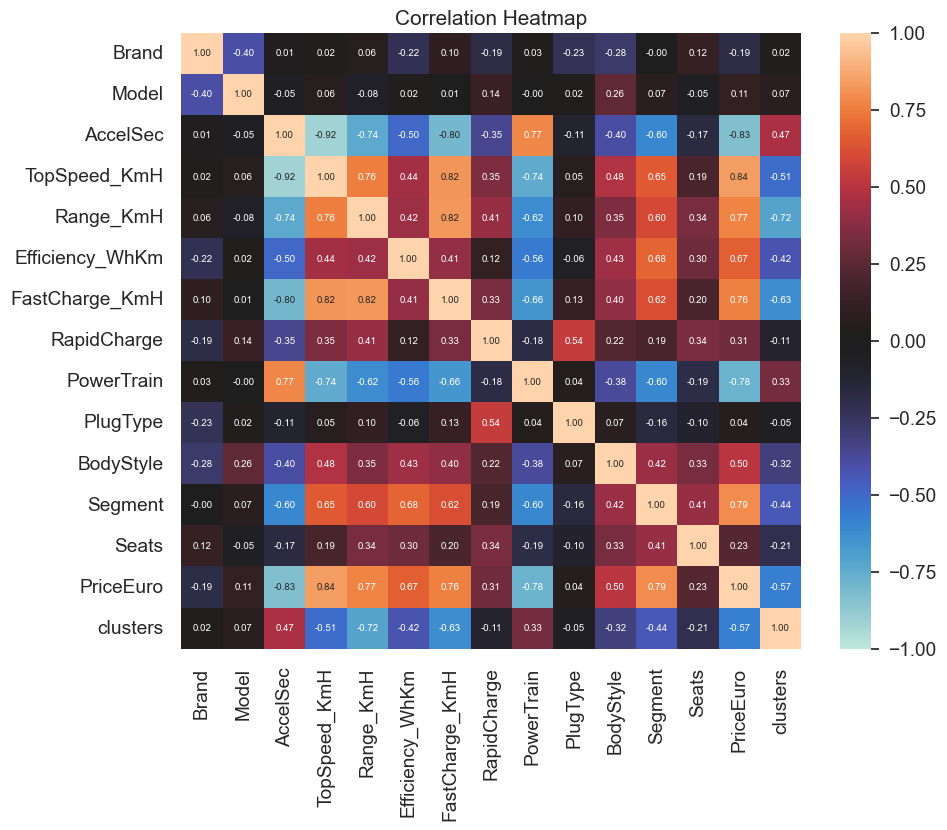

In [497]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.25)
plot = sns.heatmap(df1.corr(),annot = True,vmin= -1 , vmax= 1 , center= 0,fmt='.2f', annot_kws={'size': 7})
plt.title('Correlation Heatmap')

Model Building Using K-Means Clusteing

In [476]:
#  encoding the categorical features

# PowerTrain feature
df1['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df1['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
     


In [477]:
# labelencoding
le = LabelEncoder()
column_to_encode = ['Brand','Model','AccelSec','TopSpeed_KmH','Range_KmH','Efficiency_WhKm','FastCharge_KmH','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment','Seats','PriceEuro']
for column in column_to_encode:
    df1[column] = le.fit_transform(df1[column])

In [478]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)

# Clustering

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

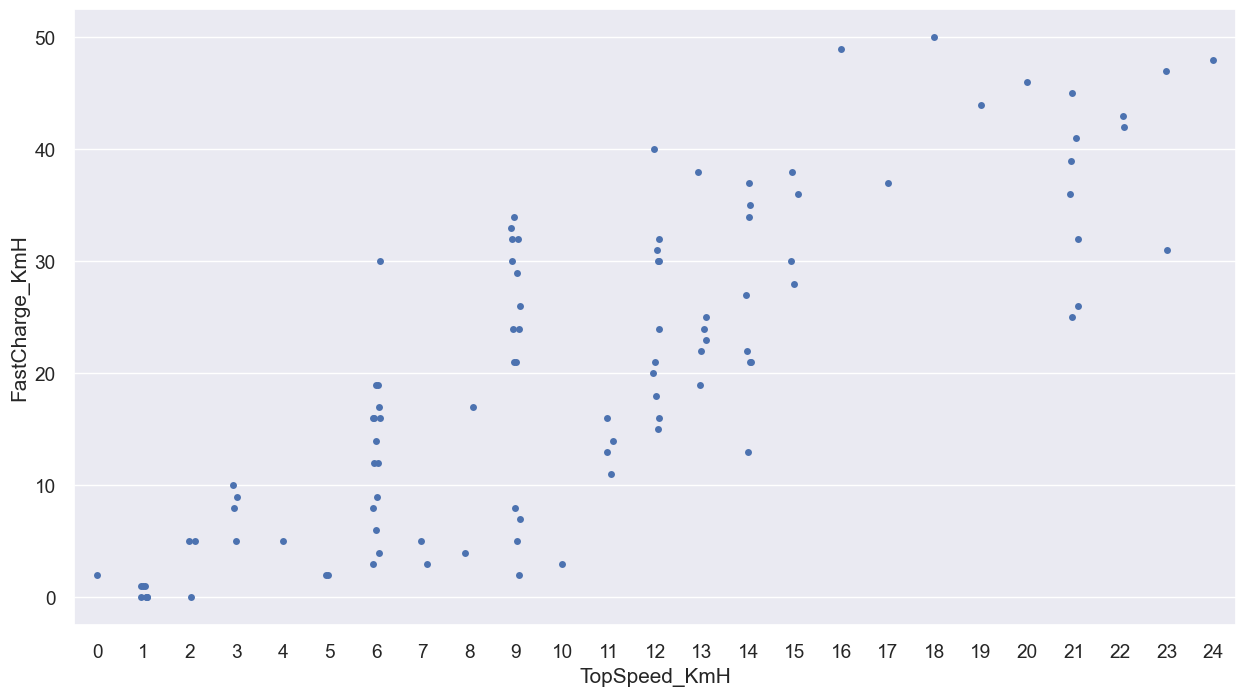

In [479]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df1, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

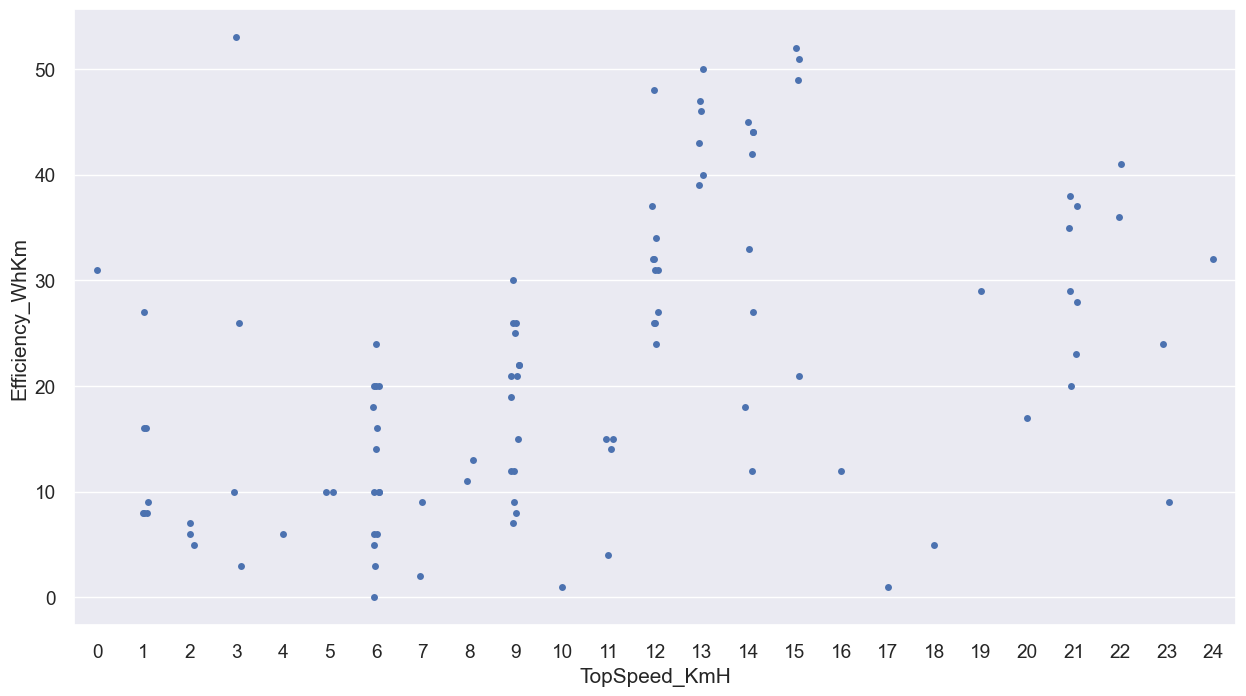

In [480]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df1, jitter=True)

In [481]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_KmH', 'Seats','PowerTrain','PriceEuro']
# Separating out the features
x = df1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [482]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -2.562613  0.323104 -1.682475  1.470633 -0.355118  0.384924 -0.588511   
1    2.226694 -0.773981 -0.397518  0.079631 -0.325600 -0.089844  0.039770   
2   -2.090264  0.299886 -0.498734  0.437188 -0.448426  0.304192 -0.356237   
3   -0.874698 -0.196623  0.136757 -0.199526  1.103099 -0.652883 -0.059755   
4    2.895563  0.260165 -0.638469 -1.020589 -0.469344 -0.102628 -0.052433   
..        ...       ...       ...       ...       ...       ...       ...   
98   0.321922 -0.431792  0.048621 -0.189908  0.598858 -0.373996 -0.009172   
99  -2.603498  0.560387  1.154460 -0.992340 -0.229470 -0.290120 -0.306651   
100 -1.080410  0.222365  0.247448 -0.304243 -0.970861  0.169173 -0.172369   
101 -2.004515  0.317223  0.990885 -0.777228 -0.251055  0.195092  0.073831   
102 -1.743125  0.140007  1.143819 -0.669441  0.265221  0.795733 -0.039470   

          PC8       PC9  
0    0.048952 -0.013390  
1   -0.082148  0.741153  
2   -0.194549 -0.168977  
3    0.582659 -0.159544  
4    0.060485  0.039827  
..        ...       ...  
98   0.106170 -0.150624  
99   0.153535 -0.264649  
100 -0.134174  0.166181  
101 -0.341022  0.037463  
102 -0.080065  0.572620  

[103 rows x 9 columns]

In [483]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_pca.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

C:\Users\monab\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                               
PC1       0.394233 -0.136572  0.138322  0.027723  0.235221  0.409865   
PC2      -0.393316  0.116713 -0.180093  0.078037 -0.193995 -0.474311   
PC3      -0.269820  0.042504  0.681225 -0.486819  0.341645 -0.083980   
PC4      -0.374871  0.065930 -0.220891  0.281659  0.344847  0.019248   
PC5      -0.183334 -0.623112 -0.436390 -0.603156 -0.060726  0.110003   
PC6      -0.370966 -0.105336 -0.150898  0.286117  0.475171  0.423897   
PC7      -0.144012 -0.710761  0.432064  0.464698 -0.212519 -0.140945   
PC8       0.356405 -0.210614 -0.154946  0.023648  0.623581 -0.621700   
PC9      -0.396939  0.112555  0.108075 -0.121052  0.088907 -0.038085   

               PC7       PC8       PC9  
variable                                
PC1       0.026148  0.460916  0.607932  
PC2       0.156433 -0.006018  0.711369  
PC3      -0.184295 -0.213050  0.145607  
PC4      -0.724536  0.285379 -0.036284  
PC5      -0.076291  0.036784  0.030428  
PC6       0.413060 -0.408533  0.060516  
PC7      -0.020781  0.057827 -0.051478  
PC8       0.144593  0.018090 -0.086322  
PC9       0.467066  0.699118 -0.295238

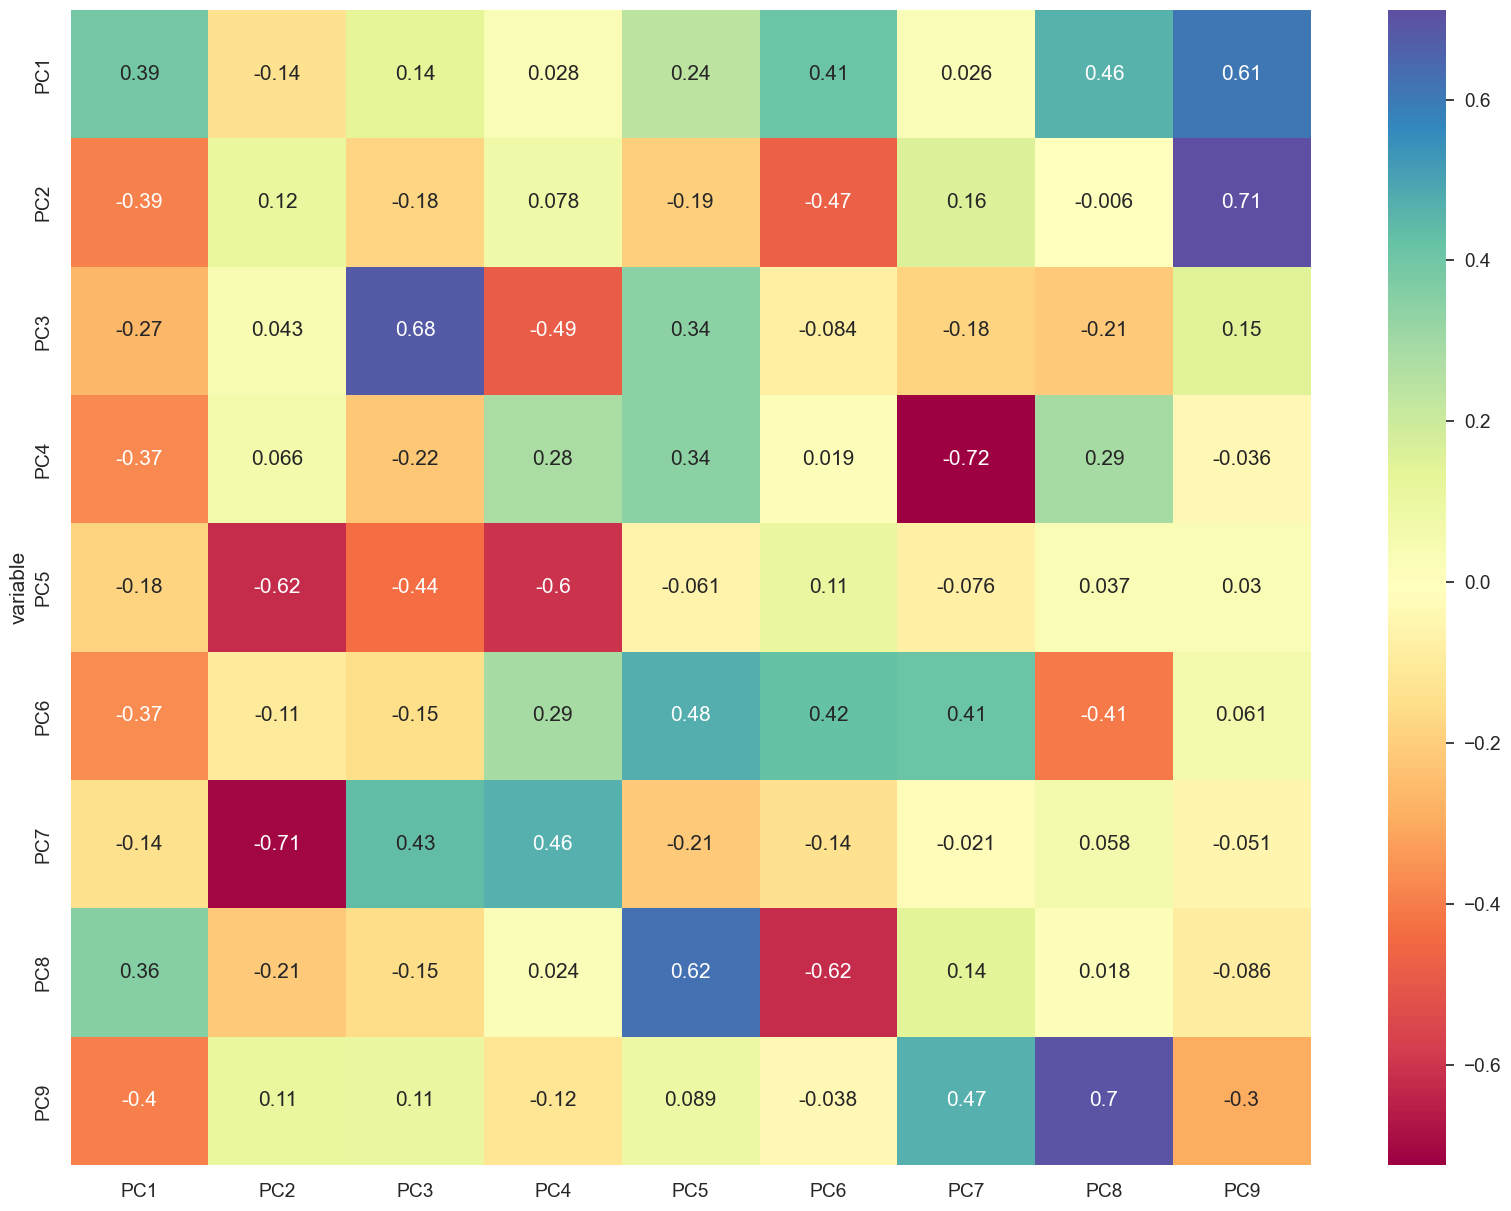

In [484]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

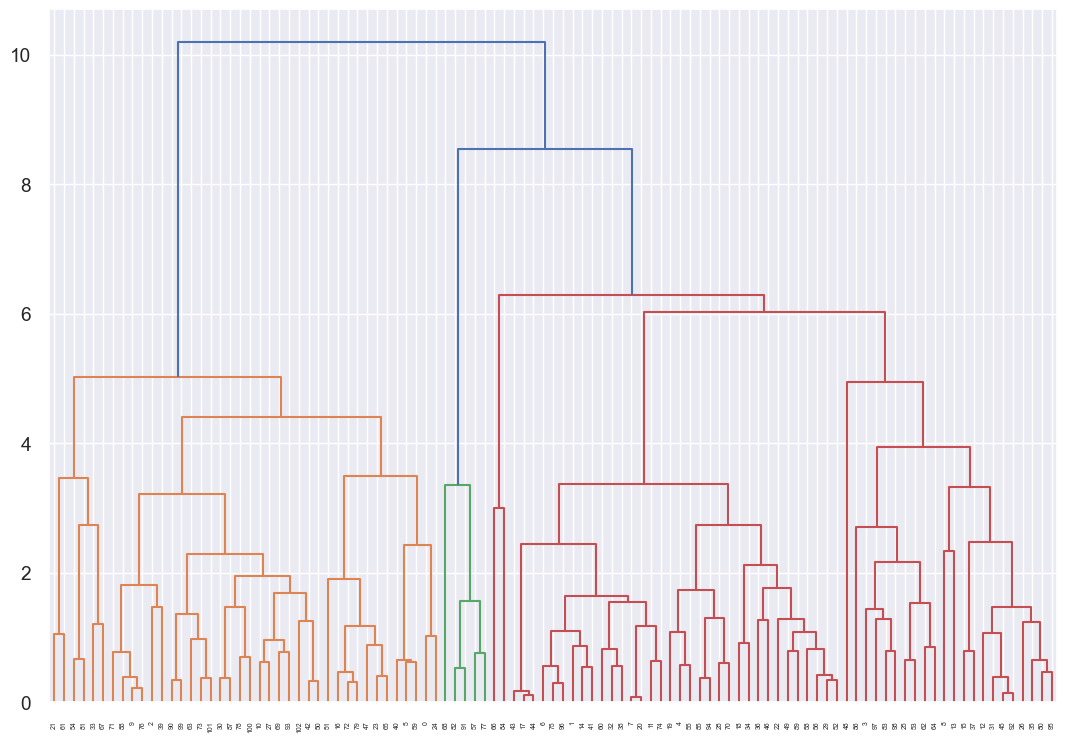

In [498]:
linked = linkage(df_pca, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

C:\Users\monab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\monab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\monab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\monab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\m

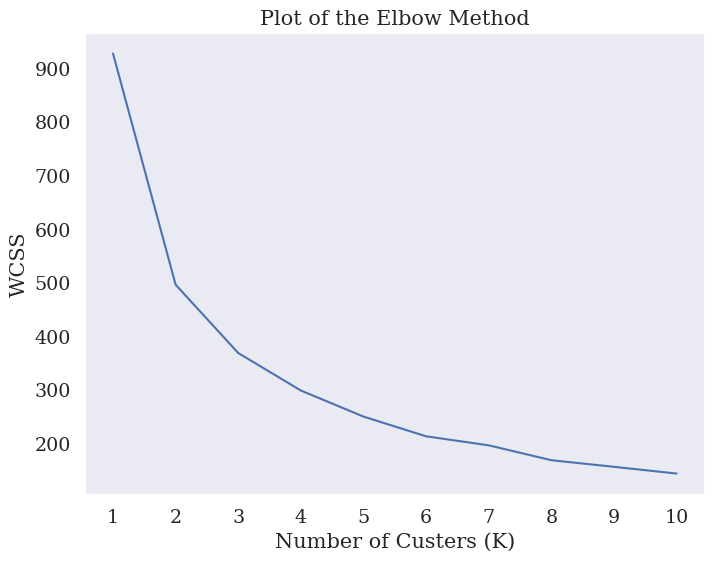

In [500]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [487]:

# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

C:\Users\monab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\monab\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=90)

In [488]:
# check the labels assigned to each data point
print(kmean.labels_)

[1 3 1 0 3 1 3 3 0 1 1 3 0 0 3 0 1 3 3 3 3 1 3 1 1 0 0 1 3 3 1 0 3 1 3 0 3
 0 3 1 1 3 1 3 3 0 3 1 0 0 1 1 3 0 1 3 3 2 3 1 3 1 0 1 0 1 3 1 2 1 3 1 1 1
 3 3 1 2 1 1 0 1 2 0 0 3 0 1 1 0 1 2 0 1 3 0 3 0 0 1 1 1 1]


In [489]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    40
3    33
0    25
2     5
dtype: int64

In [490]:
# adding a new feature of cluster labels to the dataset 3
df1['clusters'] = kmean.labels_

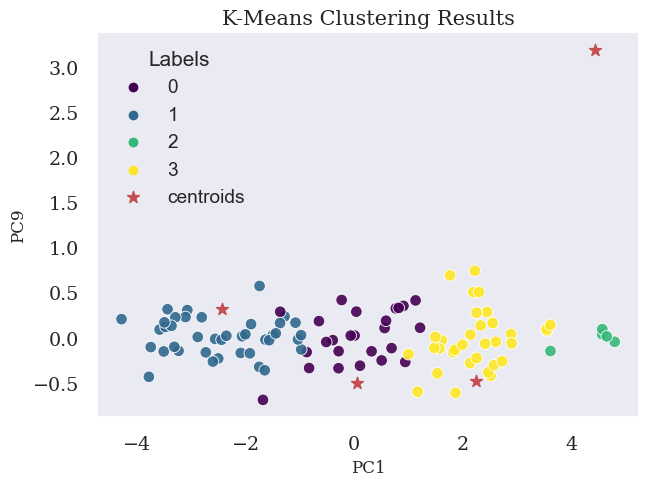

In [491]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

2. Analysis of wheeler in States

Analysis of 2-wheeler EVs

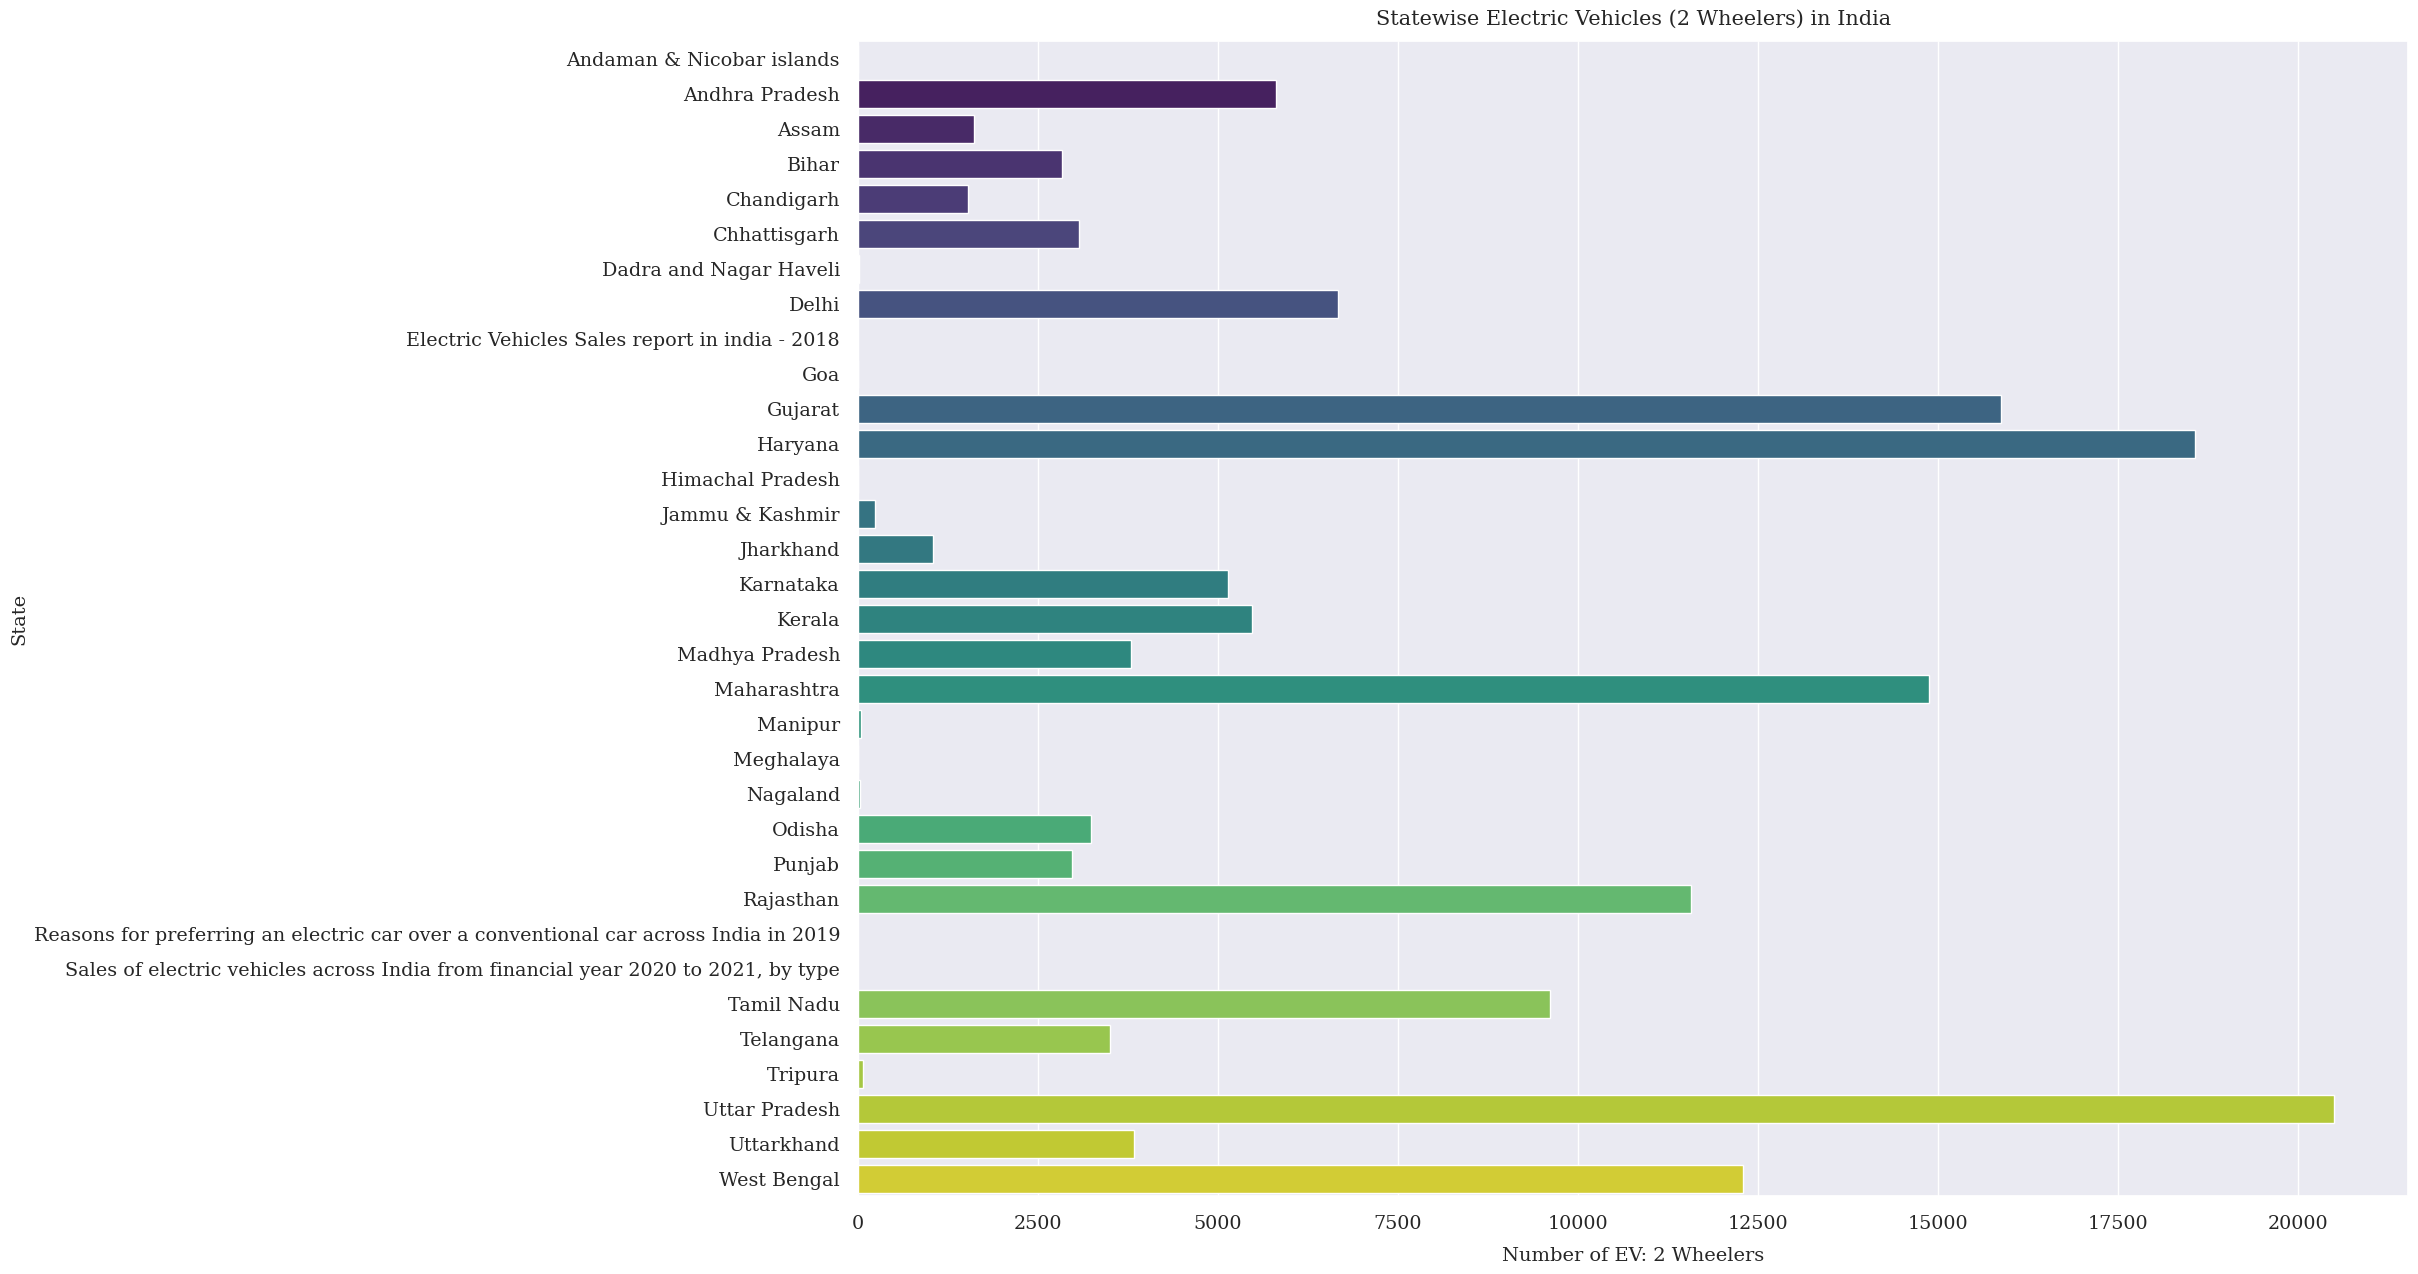

In [492]:
# 2 wheelers data visualization from dataset 2
sns.barplot(data=df2, y=df2['State'].sort_values(ascending=True), x='2 Wheelers', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()
     

Analysis of 3-wheeler EVs

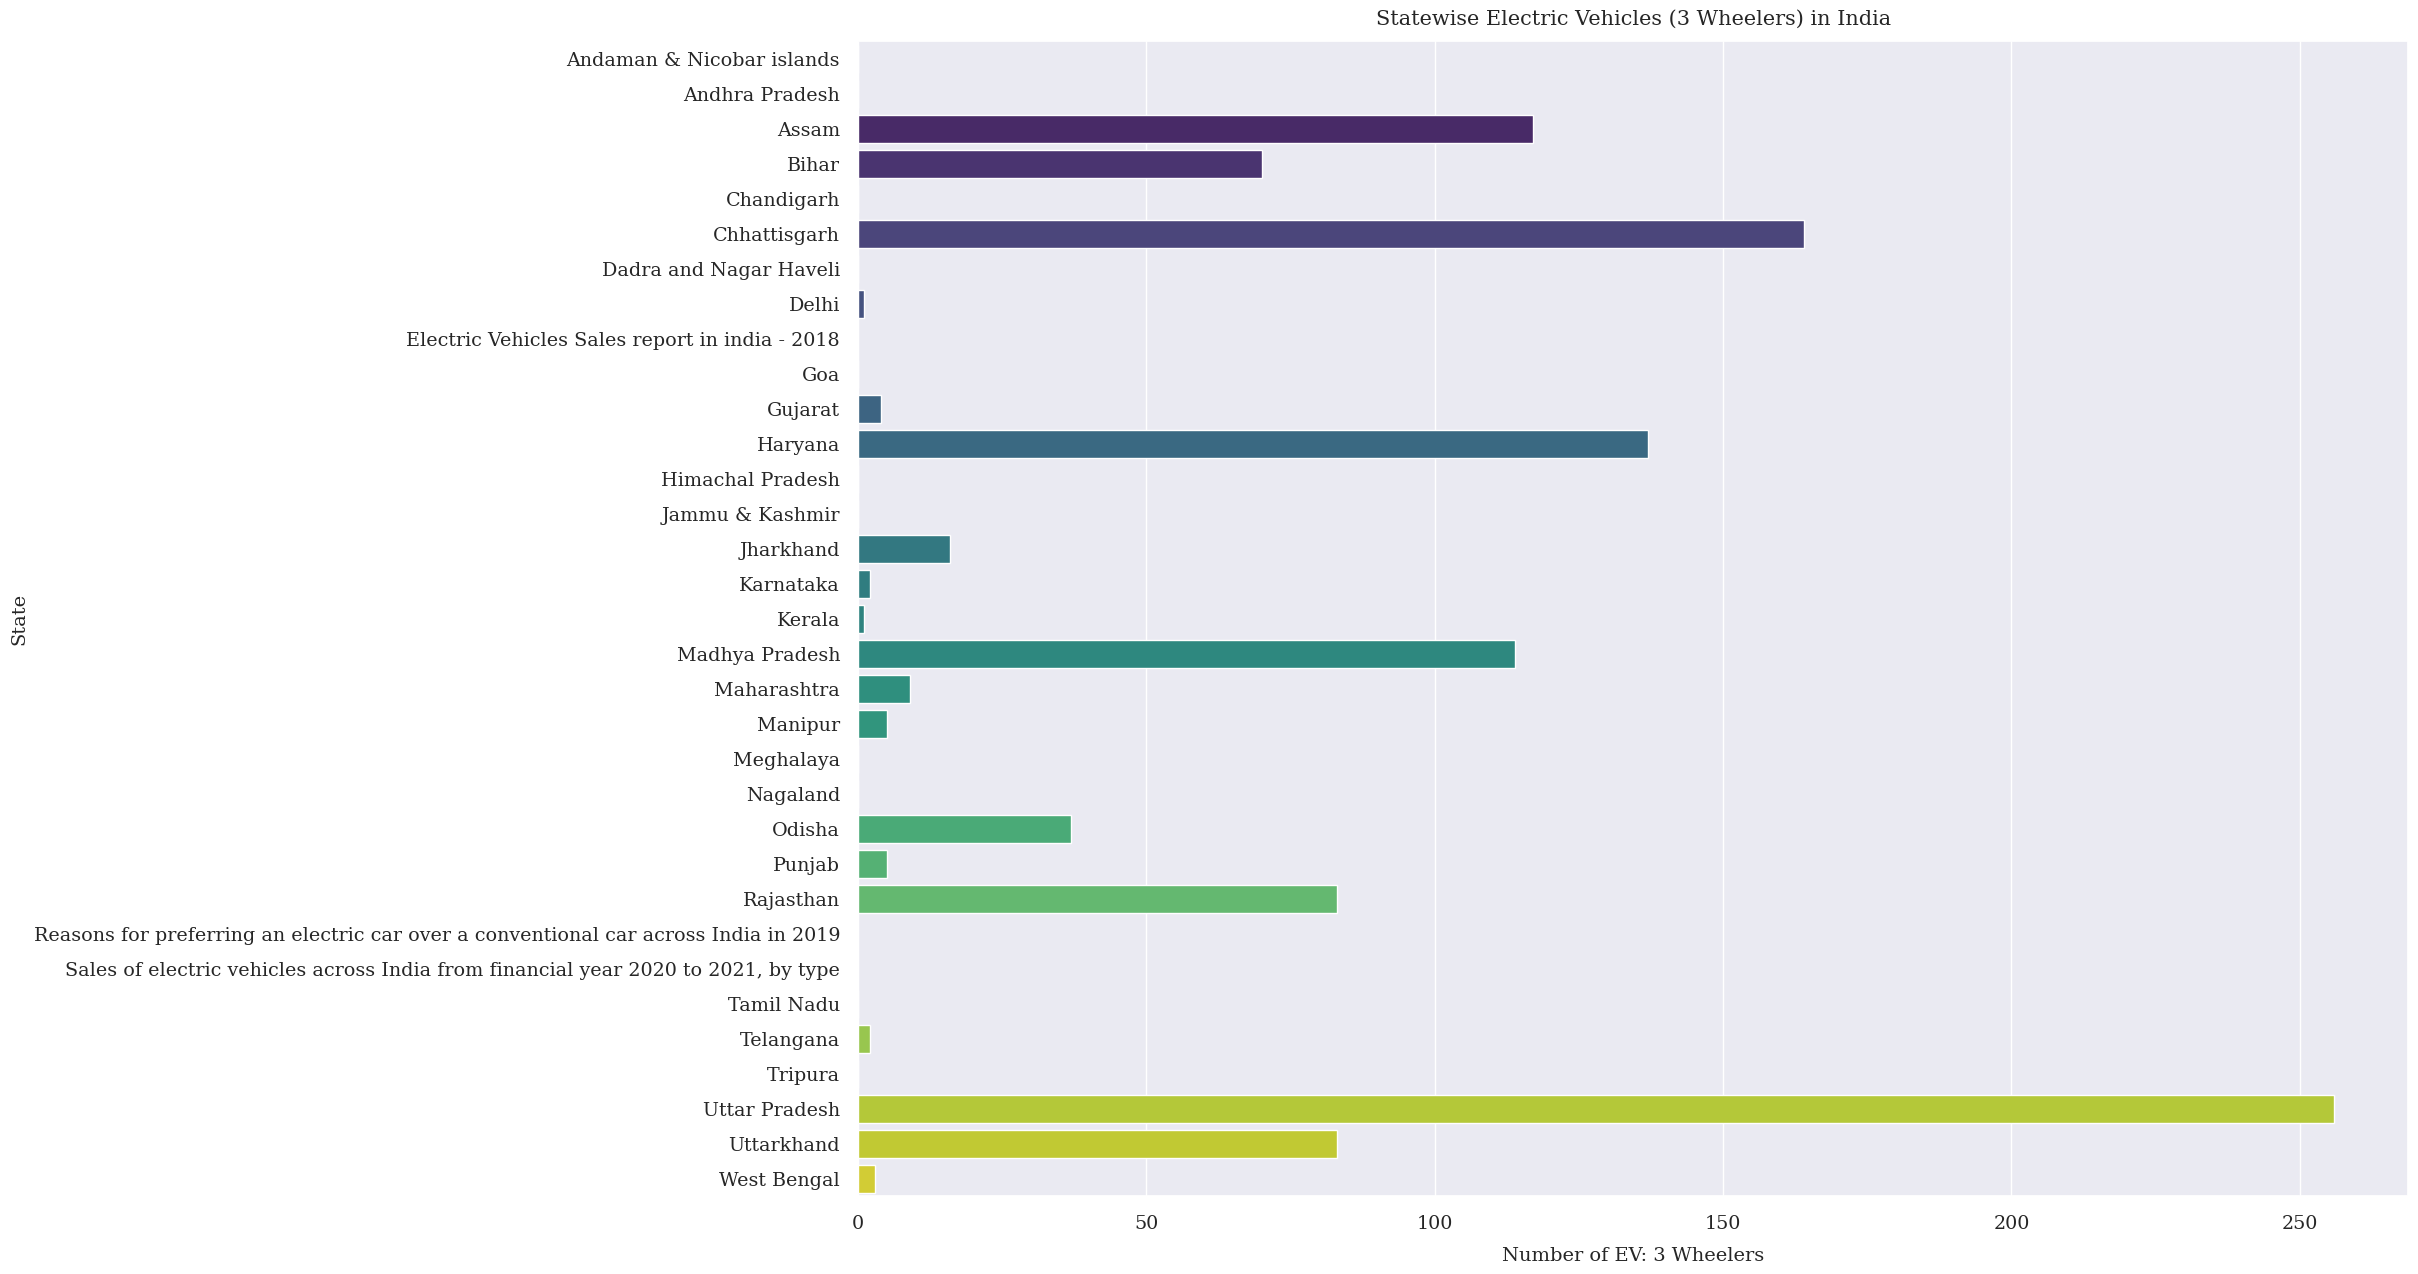

In [493]:
# 3 wheelers data visualization from dataset 2
sns.barplot(data=df2, y=df2['State'].sort_values(ascending=True), x='3 Wheelers', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

Analysis 4-wheeler EVs

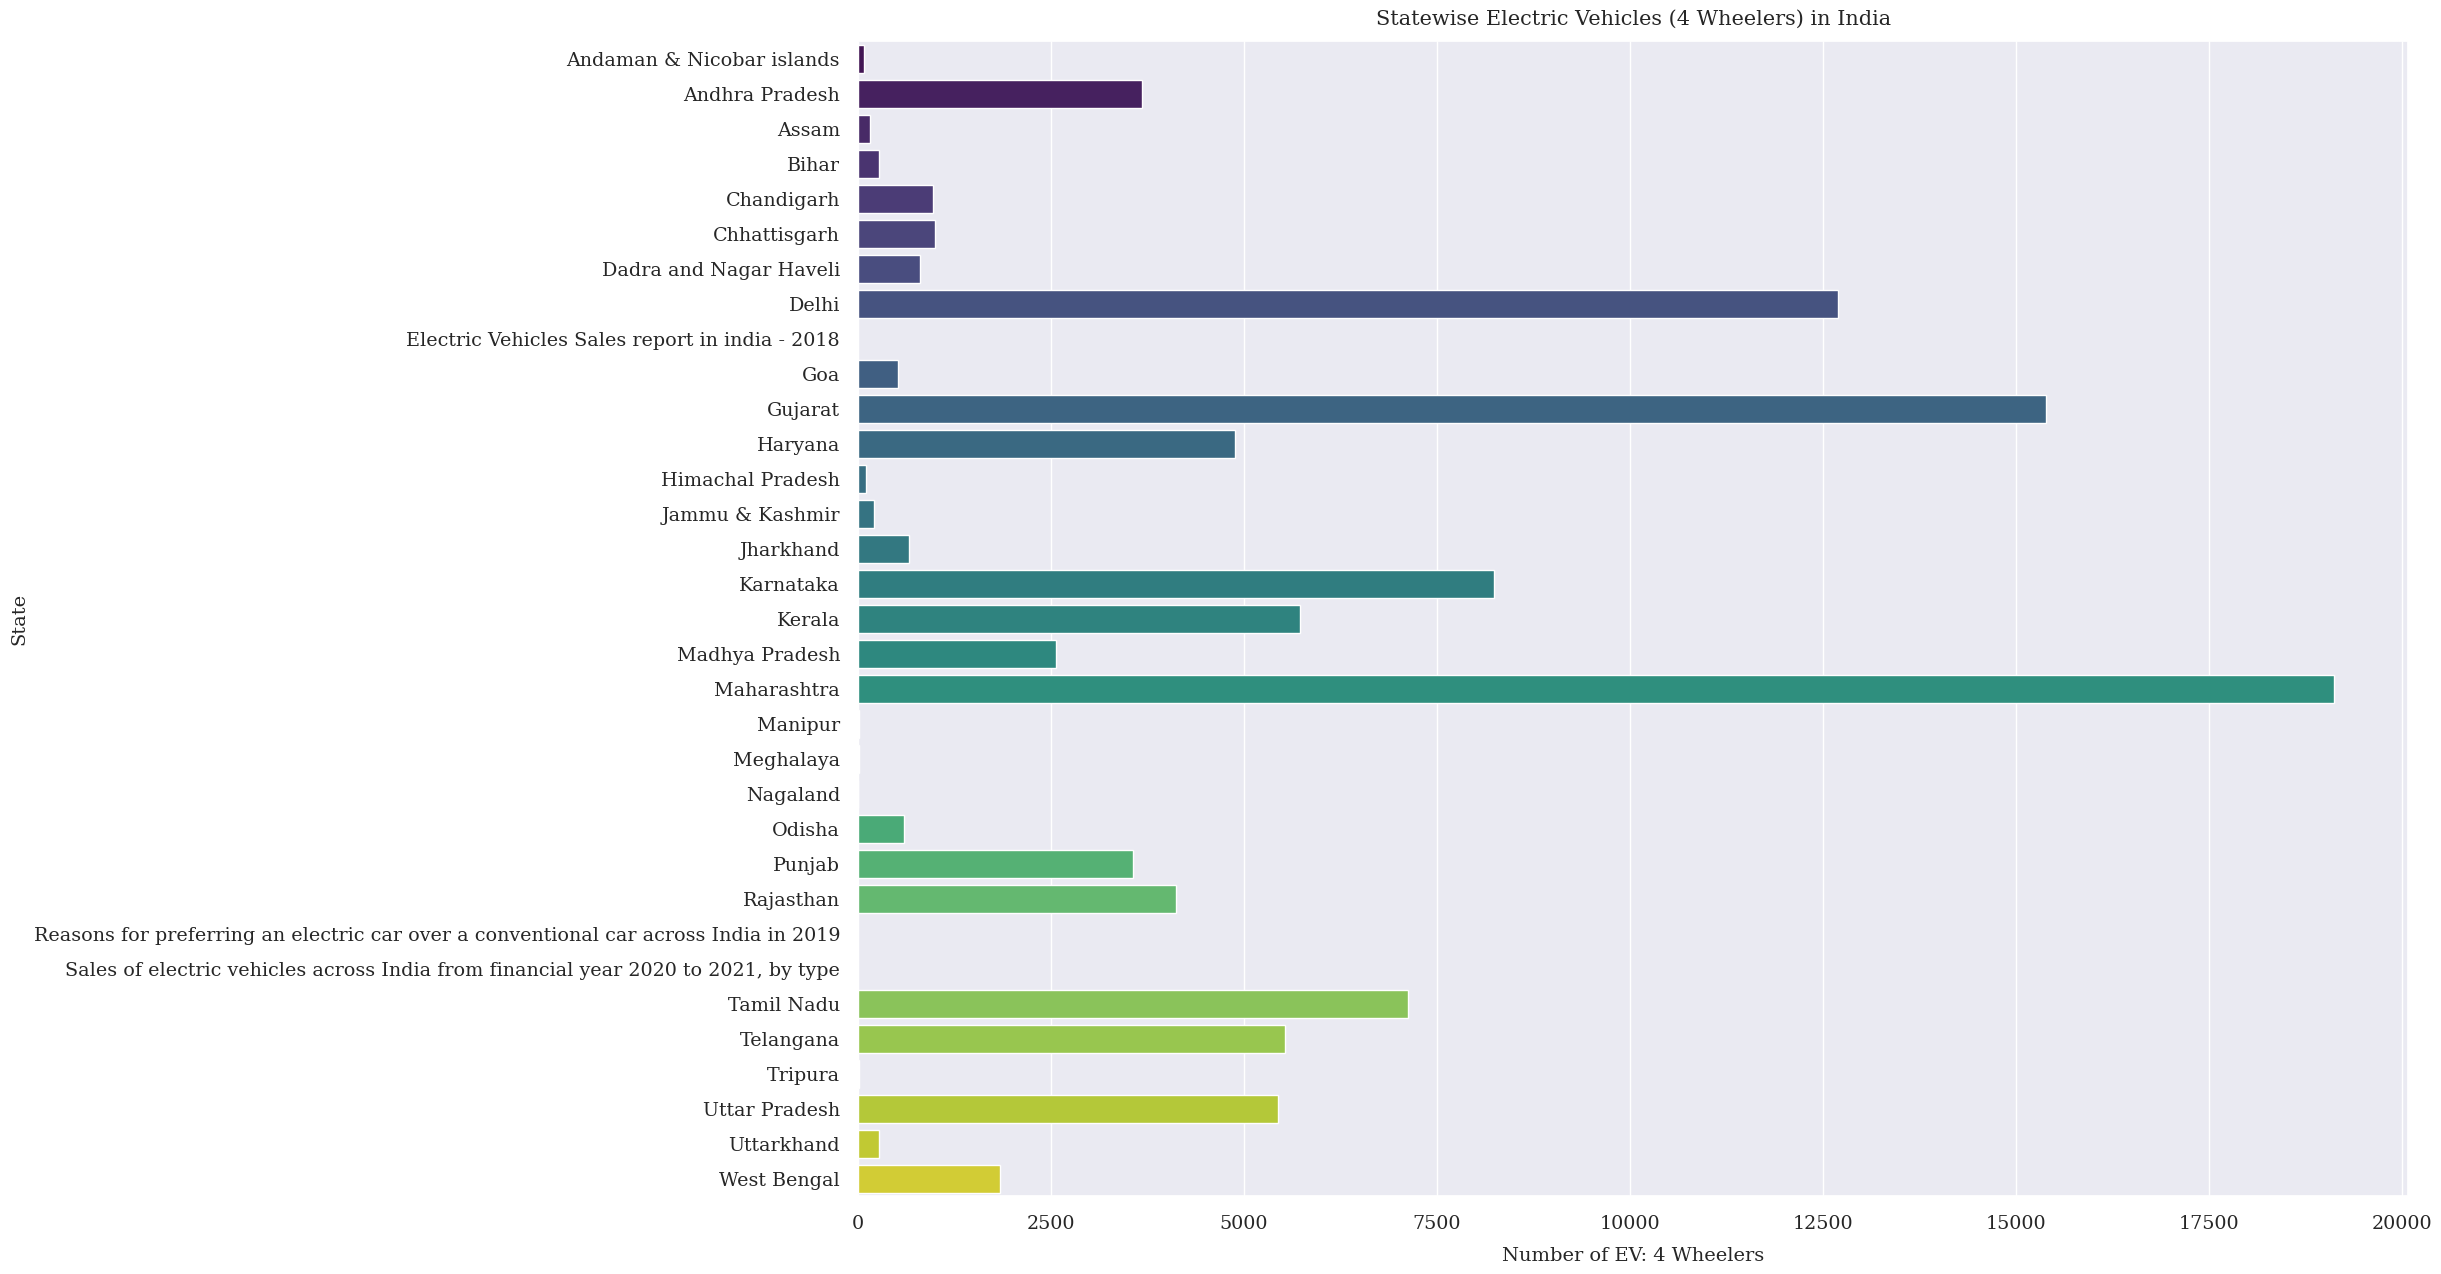

In [494]:
# 4 wheelers data visualization from dataset 2
sns.barplot(data=df2, y=df2['State'].sort_values(ascending=True), x='Cars', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()


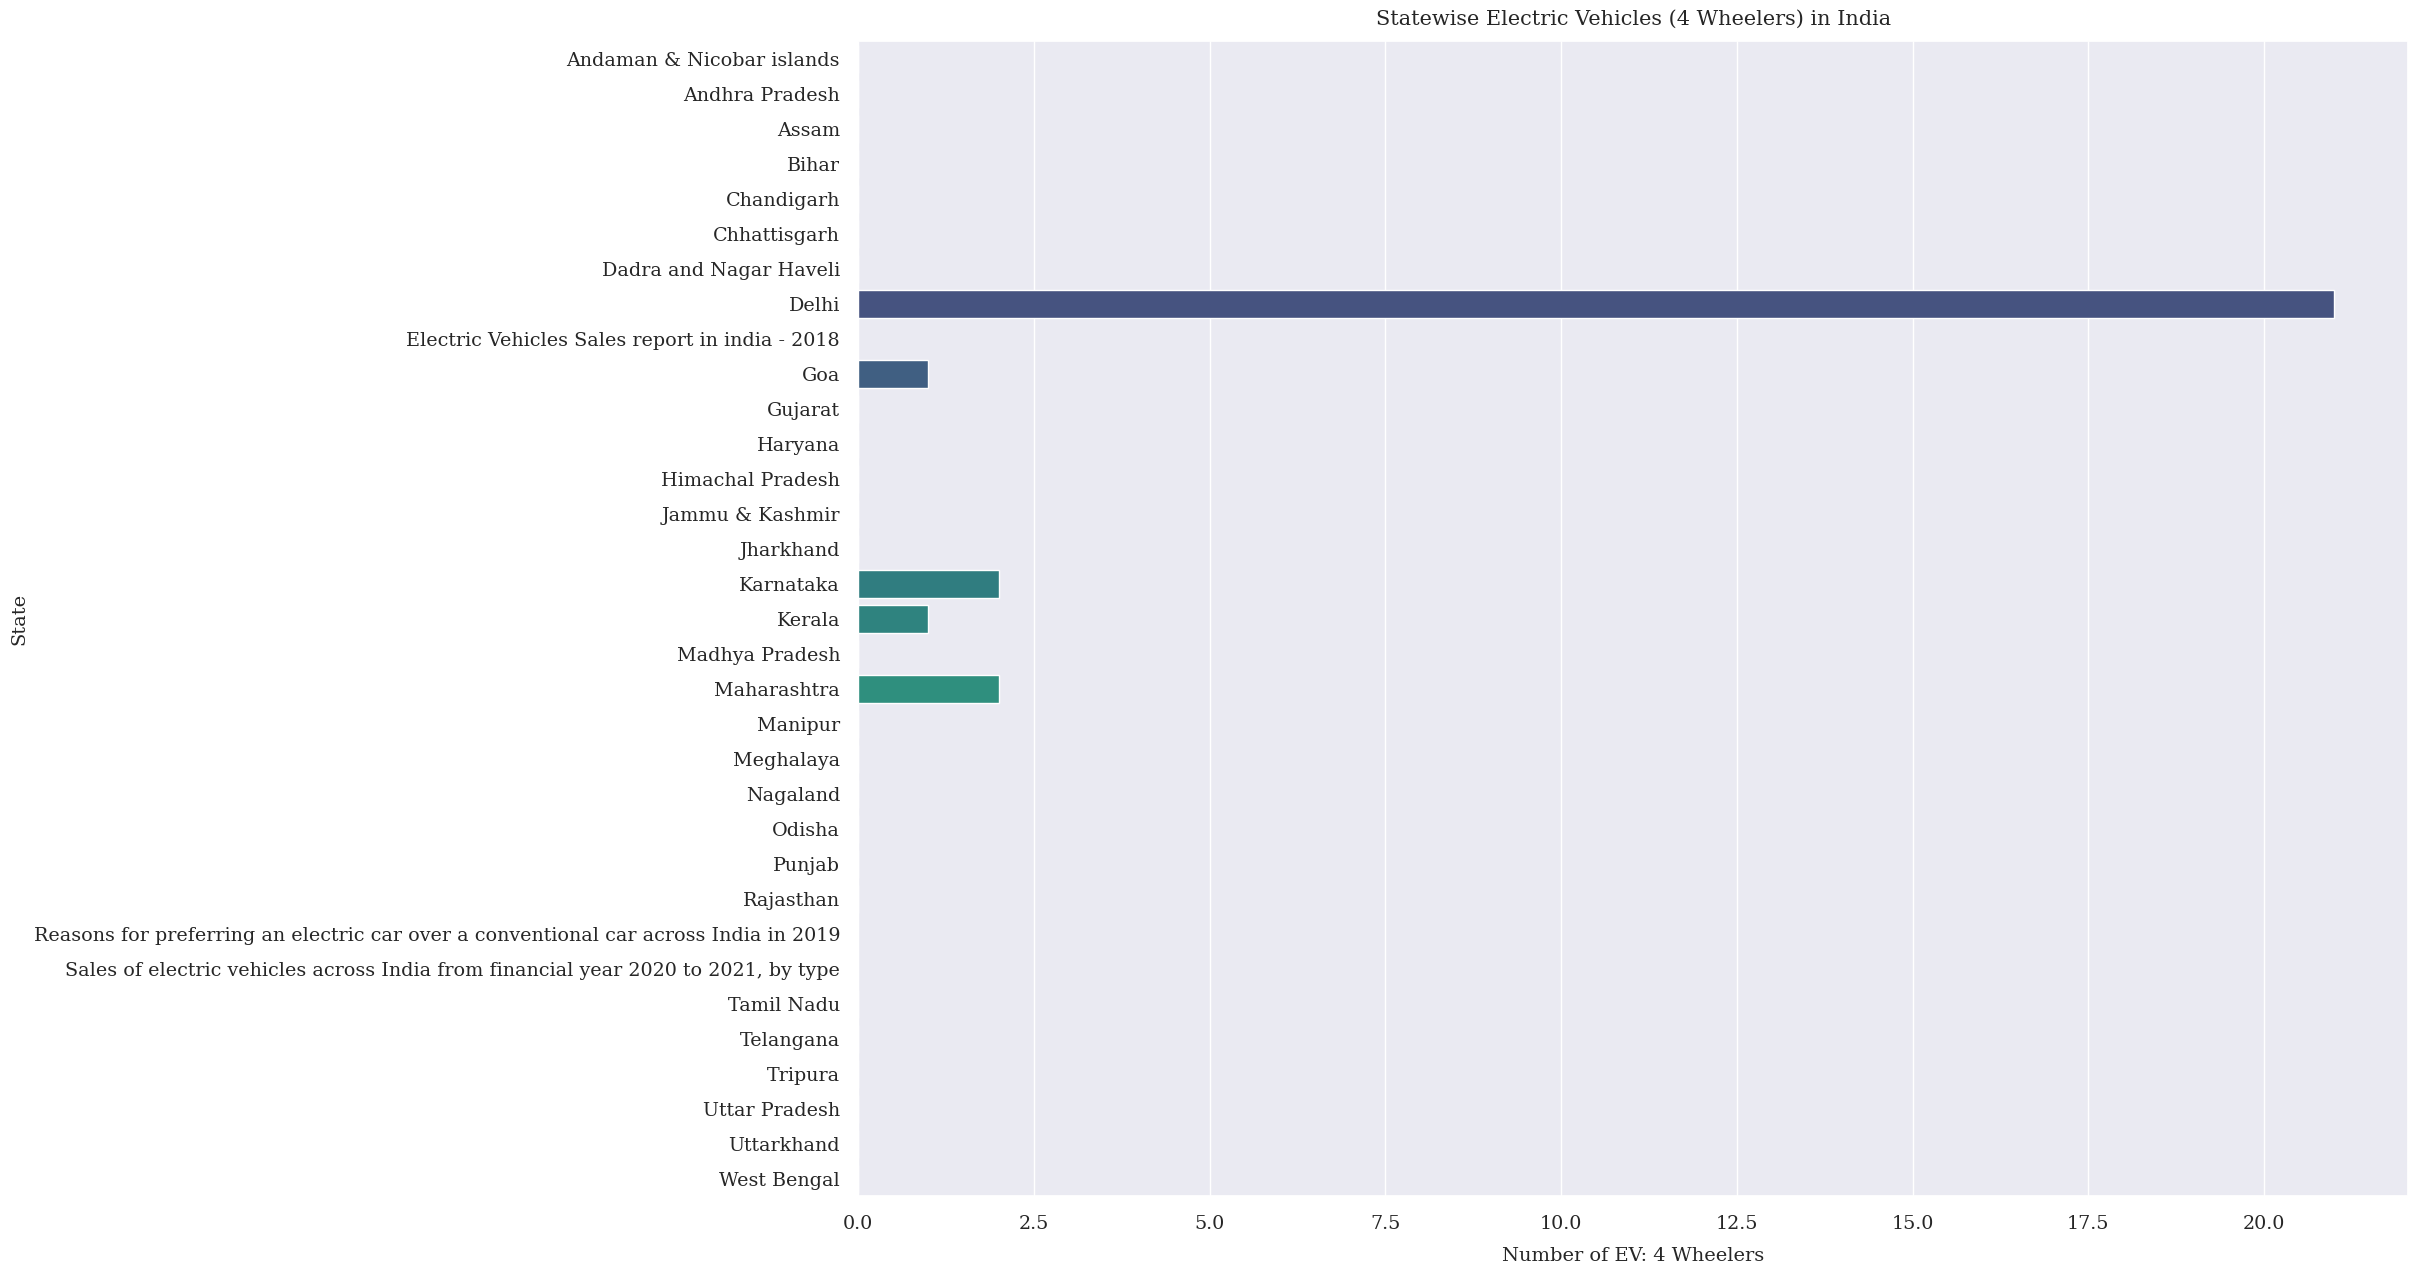

In [495]:
# 4 wheelers data visualization from dataset 1
sns.barplot(data=df2, y=df2['State'].sort_values(ascending=True), x='Buses', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()